# SaaS Connector Pack - Gold Product EDA (2023)

> # Summary
>Summarized below are the highlights from the key findings from this analysis. Based on the 12 month period in 2023:
>
>General Performance Report
>* Total revenue for SaaS Connector Pack - Gold in 2023 is at 3378.5740 dollars. It is profitable, with total net profit at 3378.5740 dollars. This put SaaS Connector Pack - Gold's profit margin at 42 %.
>* With few users coming in and out with purchases, revenue growth fluctuates significantly. Some month there is negative growth as, users completely churned and there is few new user; as in the month of February with 1 new user, 100% user churn, and -96.7% CMGR. Some month, bulk purchases from new users cover for the churn rate, such as in May, with 6 new users, 100% churn rate, and 7.8% CMGR. On average, CMGR is around 1%.
>* On average, SaaS Connector Pack - Gold have around 24 users each month, with 6 being active. There is a 92% likelihood of users churning in the next month.
>
>Monthly Cohort Analysis
>* Generally for most cohorts, there is no activity beyond the initial purchase (general retention rate is 0%, general NDR rates are 0%).
>* With no subsequent purchases, each cohort's net revenue value depends on the purchase in initial month. May cohort, who has 6 users in the initial month, has the highest initial purchase, at 415.51.
>* On a per-user basis profit-wise, March cohort has had a relatively more active per user purchases than other cohorts.
>* There are no negative profit values in all cohorts for SaaS Connector Pack - Gold.
>
>Profitability
>* Pre-discounts,the financial health of SaaS Connector Pack - Gold fluctuates, but profits remain positive every month. Some months show concerning dips. February had a severe dip of 5.9850, which rose sharply to 239.8407 in March, then dip back to 32.5836 in April.
>* Lower positive profits observed in summer months; June (44.9193), July (28.9500), and August (68.4538). Profits rose steadily from September (201.8162), peaked in November (265.1420), and slightly decreased but remained strong in December (208.9899).
>
>Discounting EDA
>* There are 71 invoices for SaaS Connector Pack - Gold in 2023, 31 of which were applied discounts (~ 44%). With more orders being without discounts, this suggests a strong demand for SaaS Connector Pack - Gold, with customers willing to pay the full price.
>* March is the top month with profits at 238.07. January and September are hit hardest, with reductions of around 62 and 48 but still retain strong profits at 110.48 and 153.43.
>* All discounted orders are applied 20% discounts. Discounting strategy has been effective, as all months remain profitable.
>* No discounting is still reliable and maintains steady profits despite variability. Meanwhile, a 20% discount can yield higher profits but is less consistent and more fluctuating (although it can be more stable in some months like December where orders are generally higher).
>
>Ideal Customer Profile (ICP) EDA
>* For the SaaS Connector Pack - Gold, focus on the SMB segment, which leads in Net Revenue (46.10%), Total Quantity (40.25%), and Total Sales (46.29%), with a Net Profit Before Discount of 774.93 and Net Profit of 662.12. Prioritize the Strategic segment as well, as it holds the highest share in Total Accounts (43.66%) and significant shares in Net Revenue (38.86%) and Total Quantity (40.66%), with a Net Profit Before Discount of 628.26 and Net Profit of 567.57. Though of a lesser priority, it is profitable to maintain the Enterprise segment, which achieves a Net Profit Before Discount of 212.07 and Net Profit of 212.07.
>* In the SMB segment,  Finance in EMEA, along with Communications and Energy industries in APJ perform best and need marketing focus.
>* In the Strategic segment, Finance in EMEA excel. 
>* In the Enterprise segment, focus on Finance and Energy industries in EMEA for strategic growth.
>* Throughout the year, AMER's sales and net profits were consistently lower, with noticeable peaks only in September and November. Overall, it faced challenges in achieving high sales volumes and market presence compared to other regions.
>* EMEA's performance surged from September onwards, with the highest sales in October, November, and December. This region led in both sales and net profit, demonstrating the strongest financial performance overall.
>* APJ showed superior performance earlier in the year, particularly in January and March, achieving high sales and net profits. Despite its strong start, APJ experienced significant fluctuations in sales and profits during the mid-year months.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
pd.set_option('display.max_columns',30)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
df = pd.read_csv('SaaS-Sales.csv')
df=df.drop('Row ID',axis=1)
df=df[[ 
        'Order ID',                        
        'Order Date',              
        'Date Key',                
    #'Contact Name',            
        'Customer ID',                
        'Customer',               
        'Segment',                 
        'Industry',                
        'Region',                 
        'Subregion', 
        'Country', 
        'City', 
    #'License',   
        'Product',
        'Sales', 
        'Quantity', 
        'Discount', 
        'Profit']]

In [3]:
# Rekayasa fitur dan pembuatan kolom2 baru untuk keperluan analisis bisnis

# nilai diskon dalam bentuk dolar 
df['total_discount_in_dollars']=df['Sales'] * df['Discount']

# nilai sales satu unit produk
df['selling_price']=df['Sales'] / df['Quantity'] 

# net profit sebelum penerapan diskon
df['(net)_profit_before_discount']=df['Sales'] * df['Discount'] + df['Profit']

# net profit untuk penjualan 1 unit produk
df['net_profit_per_unit_sold']=df['Profit'] / df['Quantity'] 

# ubah nama kolom Profit menjadi 'net_profit'
df=df.rename(columns={'Profit':'net_profit'}) 

# melihat profit margin, idealnya SaaS diatas 20%
df['profit_margin']=df['net_profit'] / df['Sales'] * 100 

# pertimbangan nilai sales dari penerapan diskon
df['discounted_sales']=df['Sales'] - (df['Discount']*df['Sales']) 

In [4]:
# Rekayasa fitur, mengubah dari tipe data objek menjadi tipe data datetime untuk ekstraksi tahun dan bulan
df['Order Date'] = pd.DatetimeIndex(df['Order Date'])
df['month']=df['Order Date'].dt.month
df['year']=df['Order Date'].dt.year
df['year_month'] = df['Order Date'].dt.to_period('M')

------------

In [5]:
# for later cohort analysis, make a template for monthly period to see user activity by months
min_month = df['Order Date'].values.astype('datetime64[M]').min()
max_month = df['Order Date'].values.astype('datetime64[M]').max()
template_table = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
template_table.columns = ['Month']
# to merge month template with other df, with 'key'
template_table['key'] = 1

In [6]:
#slice main df by product first
prod13 = df.query("Product == 'SaaS Connector Pack - Gold'")
# then slice product df by year of analysis
prod13_2023=prod13.query('year == 2023')

----

### General Performance Report

In [8]:
# new column in product df to show each customer/user first purchase for the 2023 period, as "reg_date" or registration date
prod13_2023['reg_date'] = prod13_2023.groupby('Customer ID')[['Order Date']].transform('min')

C:\Users\arizk\AppData\Local\Temp\ipykernel_13256\2202319255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod13_2023['reg_date'] = prod13_2023.groupby('Customer ID')[['Order Date']].transform('min')


In [9]:
# make a user df, from the product df
prod13_2023_user = prod13_2023.groupby(['Customer ID','Customer'])['reg_date'].min().reset_index()

In [10]:
# from user df, extract month datetime data, from date of first purchase
prod13_2023_user['reg_month']= prod13_2023_user['reg_date'].values.astype('datetime64[M]')

In [11]:
# with the month template df which only contains full 12 month timeframe, merge with user df
prod13_2023_user['key'] = 1
prod13_2023_user = template_table.merge(prod13_2023_user,on='key')
prod13_2023_user =prod13_2023_user.drop('key',axis=1)

In [12]:
# need to be rid of extra rows now, since merging with a month template means that there are null customer ids which doesn't make sense timewise.
prod13_2023_user = prod13_2023_user[prod13_2023_user['Month']>=prod13_2023_user['reg_month']]

In [13]:
prod13_2023['Month'] = prod13_2023['Order Date'].values.astype('datetime64[M]')
sales_month = prod13_2023.groupby(['Customer ID','Month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
account = prod13_2023.groupby(['Customer ID','Month'])[['Order ID']].nunique().reset_index()
account.columns = ['Customer ID','Month', 'account']
prod13_2023_user = prod13_2023_user.merge(sales_month,how='left',on=['Customer ID','Month'])
prod13_2023_user = prod13_2023_user.merge(account,how='left',on=['Customer ID','Month'])

C:\Users\arizk\AppData\Local\Temp\ipykernel_13256\1390420425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod13_2023['Month'] = prod13_2023['Order Date'].values.astype('datetime64[M]')


In [13]:
prod13_2023_user['user'] = 1    
prod13_2023_user['new user'] = (prod13_2023_user['reg_month'] == prod13_2023_user['Month']) * 1 
prod13_2023_user['active'] = (prod13_2023_user['Sales'] > 0) * 1   
prod13_2023_user['active_prev'] = (prod13_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID'])['active'].shift(1))
prod13_2023_user['change_status'] = (prod13_2023_user['active'] != prod13_2023_user['active_prev']) * 1
prod13_2023_user['session_id'] = (prod13_2023_user.sort_values(by=['Month'], ascending=True)
                       .groupby(['Customer ID'])['change_status'].cumsum())
prod13_2023_user['inactive'] = (prod13_2023_user['active'] == 0) * 1
prod13_2023_user['month_inactive'] = (prod13_2023_user.sort_values(by=['Month'], ascending=True)
.groupby(['Customer ID','session_id'])['inactive'].cumsum())

In [14]:
#SaaS Connector Pack - Gold monthly user report (2023)
prod13_2023_report = prod13_2023_user.groupby('Month')[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount' ,'net_profit', 'user','new user','active']].agg('sum')
prod13_2023_report

,Quantity,account,Sales,discounted_sales,(net)_profit_before_discount,net_profit,user,new user,active
Month,,,,,,,,,
2023-01-01,10.0000,5.0000,320.4760,258.7448,172.2098,110.4786,5,5,5
2023-02-01,5.0000,1.0000,10.6400,8.5120,5.9850,3.8570,6,1,1
2023-03-01,25.0000,7.0000,517.0160,515.2448,239.8407,238.0695,11,5,7
2023-04-01,8.0000,3.0000,64.0680,60.3304,32.5836,28.8460,14,3,3
2023-05-01,33.0000,7.0000,432.8020,415.5076,206.9207,189.6263,20,6,6
2023-06-01,8.0000,2.0000,81.5280,65.2224,44.9193,28.6137,21,1,2
2023-07-01,5.0000,1.0000,57.9000,57.9000,28.9500,28.9500,22,1,1
2023-08-01,17.0000,6.0000,135.1600,129.8720,68.4538,63.1658,26,4,6
2023-09-01,46.0000,14.0000,395.6400,347.2560,201.8162,153.4322,34,8,11


> To use some kind of SaaS KPI metrics from this dataset is quite a task. We need to calculate, among others, churn rate. But since it is a fictional dataset, and there isn't a clear guideline on what defines churn from the company (1 month, 2 month inactive and so on), here I'll just use the total number of old active users divided by total users at the beginning of the month, and using that number to substract 1. This would give an estimate of how many users stop purchasing/not active (churning) on a monthly period. But this doesn't reflect real churn rate as customers who might have churned more than 1 month can be counted as active if they make a purchase. For estimation purposes only. 

In [15]:
prod13_2023_churn = prod13_2023_user.groupby('Month')[['Sales', 'net_profit', 'user','new user','active']].agg('sum')
prod13_2023_churn['old active'] = (prod13_2023_churn['active'] - prod13_2023_churn['new user'])
prod13_2023_churn['user churn'] = ((1 - (prod13_2023_churn['old active'] / prod13_2023_churn['user'].shift(1))) * 100).round()
prod13_2023_churn

,Sales,net_profit,user,new user,active,old active,user churn
Month,,,,,,,
2023-01-01,320.4760,110.4786,5,5,5,0,NaN
2023-02-01,10.6400,3.8570,6,1,1,0,100.0000
2023-03-01,517.0160,238.0695,11,5,7,2,67.0000
2023-04-01,64.0680,28.8460,14,3,3,0,100.0000
2023-05-01,432.8020,189.6263,20,6,6,0,100.0000
2023-06-01,81.5280,28.6137,21,1,2,1,95.0000
2023-07-01,57.9000,28.9500,22,1,1,0,100.0000
2023-08-01,135.1600,63.1658,26,4,6,2,91.0000
2023-09-01,395.6400,153.4322,34,8,11,3,88.0000


>Here we can see that user churn is abnormally high, as SaaS monthly churn rate is usually only 5-10%. But the reality is such. As the dataset fictional, and there isn't any kind of subscription data, we can leave it as is. Furthermore, it should be noted that the lack of any subcription data makes it unrealistic to do a recurring revenue KPI (average revenue per user, monthly recurring revenue, etc).

In [16]:
#monthly avg. user churn
prod13_2023_churn[["user", "active", "user churn"]].mean()

user         24.0000
active        5.5000
user churn   92.1818
dtype: float64

In [31]:
prod13_2023_churn[["new user"]].median()

new user   4.0000
dtype: float64

In [44]:
# calculating Compound Monthly Growth Rate (CMGR) for the past 12 month
sales_report= prod13_2023_churn.reset_index()
sales_report['month'] = sales_report.index + 1

for ind, row in sales_report.iterrows():
    sales_report.loc[ind, "month difference"] = row['month'] - 1

sales_report['CMGR'] = np.power(sales_report['Sales'] / 320.4760, #<---first month sales
(1 / sales_report['month difference'])) - 1
sales_report ['CMGR'] = (sales_report ['CMGR']) * 100
sales_report = sales_report.drop(['month', 'month difference'], axis=1)

#with pd.option_context('use_inf_as_na', True):
    #sales_report = sales_report.dropna(subset=['CMGR'], how='all')
    
sales_report

,Month,Sales,net_profit,user,new user,active,old active,user churn,CMGR
0,2023-01-01,320.4760,110.4786,5,5,5,0,NaN,0.0000
1,2023-02-01,10.6400,3.8570,6,1,1,0,100.0000,-96.6799
2,2023-03-01,517.0160,238.0695,11,5,7,2,67.0000,27.0148
3,2023-04-01,64.0680,28.8460,14,3,3,0,100.0000,-41.5279
4,2023-05-01,432.8020,189.6263,20,6,6,0,100.0000,7.8012
5,2023-06-01,81.5280,28.6137,21,1,2,1,95.0000,-23.9495
6,2023-07-01,57.9000,28.9500,22,1,1,0,100.0000,-24.8122
7,2023-08-01,135.1600,63.1658,26,4,6,2,91.0000,-11.6033
8,2023-09-01,395.6400,153.4322,34,8,11,3,88.0000,2.6687
9,2023-10-01,419.9400,186.8888,37,3,6,3,91.0000,3.0489


In [19]:
# CMGR doesn't reflect all months growth rate, so Im going to use mean or median.
sales_report['CMGR'].skew()

-1.7611369207850536

In [20]:
#The CMGR is skewed (negative), median is closest I can get to an average
sales_report['CMGR'].median()

1.1872105835284197

In [21]:
prod13_2023[['Sales', 'net_profit']].sum()

Sales        3378.5740
net_profit   1441.7590
dtype: float64

In [22]:
# Total monthly profit margin
(1441.7590/ 3378.5740) * 100

42.67359542813033

In [36]:
sales_report[['Sales', 'net_profit']].corr()

,Sales,net_profit
Sales,1.0000,0.9912
net_profit,0.9912,1.0000


In [40]:
prod13_2023_report[['new user', 'Quantity']].corr()

,new user,Quantity
new user,1.0000,0.8994
Quantity,0.8994,1.0000


**Key findings:**
1. On average, SaaS Connector Pack - Gold have around 24 users each month, with 6 being active. There is a 92% likelihood of users churning in the next month. Based on total monthly data, as users are few and don't stick around long, number of accounts and unit purchases fluctuate depending on the number of new users that month. On average, there is 4 new users each monthly period.
2.  With few users coming in and out with purchases, revenue growth fluctuates significantly. Some month there is negative growth as, users completely churned and there is few new user; as in the month of February with 1 new user, 100% user churn, and -96.7% CMGR. Some month, bulk purchases from new users cover for the churn rate, such as in May, with 6 new users, 100% churn rate, and 7.8% CMGR. On average, CMGR is around 1%.
3. Total revenue for SaaS Connector Pack - Gold in 2023 is at 3378.5740 dollars. It is profitable, with total net profit at 3378.5740 dollars. This put SaaS Connector Pack - Gold's profit margin at 42 %.
4. Based on total monthly data, increase in monthly revenue for SaaS Connector Pack - Gold seems to equal an increase in monthly profit. Using a correlation test, we can see that there is a strong positive correlation between revenue and profit. 

### Monthly Cohort Analysis

In [15]:
# Retention user
from operator import attrgetter
#----------------------------
# treat the month of registration as cohort
prod13_2023_user['date']=prod13_2023_user['Month'].dt.to_period('M')
prod13_2023_user['cohort']= prod13_2023_user['reg_month'].dt.to_period('M')
prod13_2023_user['lifetime'] = (prod13_2023_user['date'] - prod13_2023_user['cohort']).apply(attrgetter('n'))

In [16]:
prod13_2023_user.head(2)

,Month,Customer ID,Customer,reg_date,reg_month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit,account,user,new user,active,active_prev,change_status,session_id,inactive,month_inactive,date,cohort,lifetime
0,2023-01-01,1026,CVS Health,2023-01-15,2023-01-01,1.0000,21.7440,17.3952,11.6874,7.3386,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0
1,2023-01-01,1061,Marathon Petroleum,2023-01-13,2023-01-01,1.0000,9.7800,9.7800,4.8900,4.8900,1.0000,1,1,1,NaN,1,1,0,0,2023-01,2023-01,0


In [16]:
prod13_cohort = prod13_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['user','new user','active']].agg('sum')
prod13_cohort ['active rate'] = (prod13_cohort['active'] / prod13_cohort['user']) * 100
prod13_cohort

,reg_month,lifetime,user,new user,active,active rate
0,2023-01-01,0,5,5,5,100.0000
1,2023-01-01,1,5,0,0,0.0000
2,2023-01-01,2,5,0,2,40.0000
3,2023-01-01,3,5,0,0,0.0000
4,2023-01-01,4,5,0,0,0.0000
...,...,...,...,...,...,...
73,2023-10-01,1,3,0,0,0.0000
74,2023-10-01,2,3,0,0,0.0000
75,2023-11-01,0,7,7,7,100.0000
76,2023-11-01,1,7,0,1,14.2857


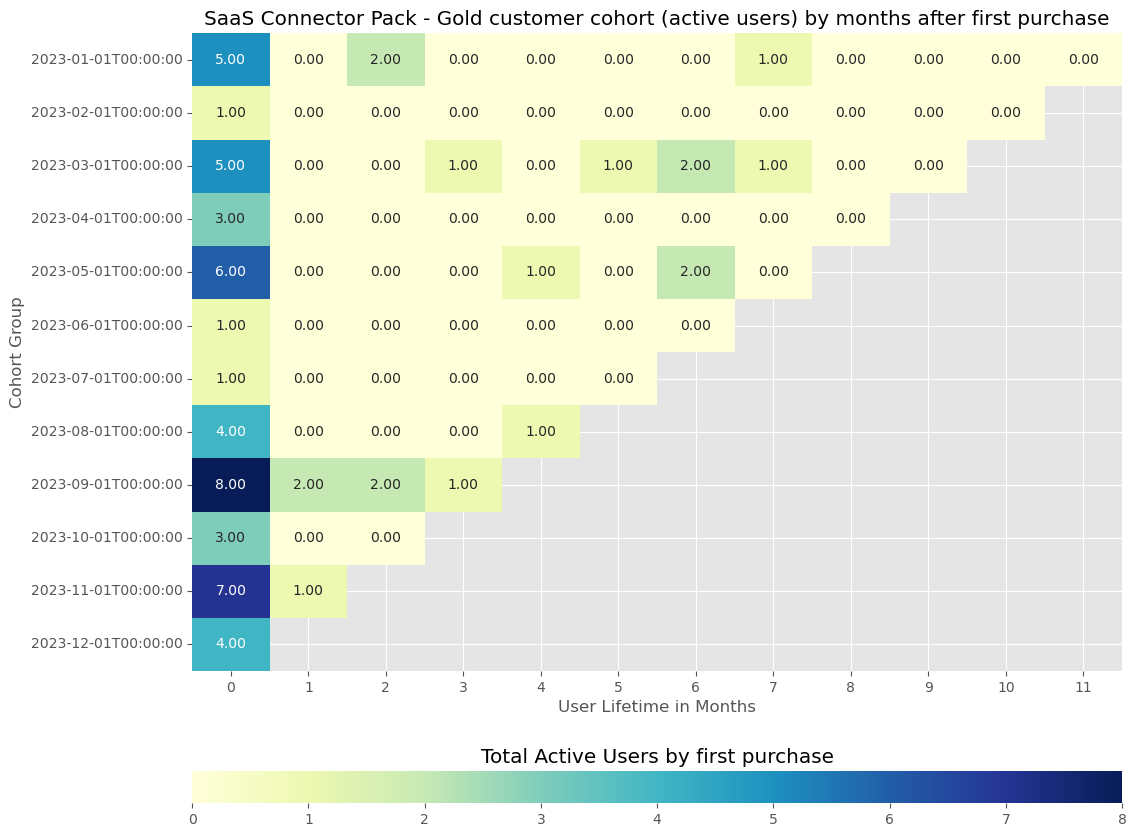

In [18]:
# customer cohort
pivot0 =prod13_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot0,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack - Gold customer cohort (active users) by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Total Active Users by first purchase'
)

plt.show()

- We can see that for most cohorts, there is no activity beyond their initial purchase.
- September cohort has the highest initial active users (8), with 1-2 user active after initial purchase.

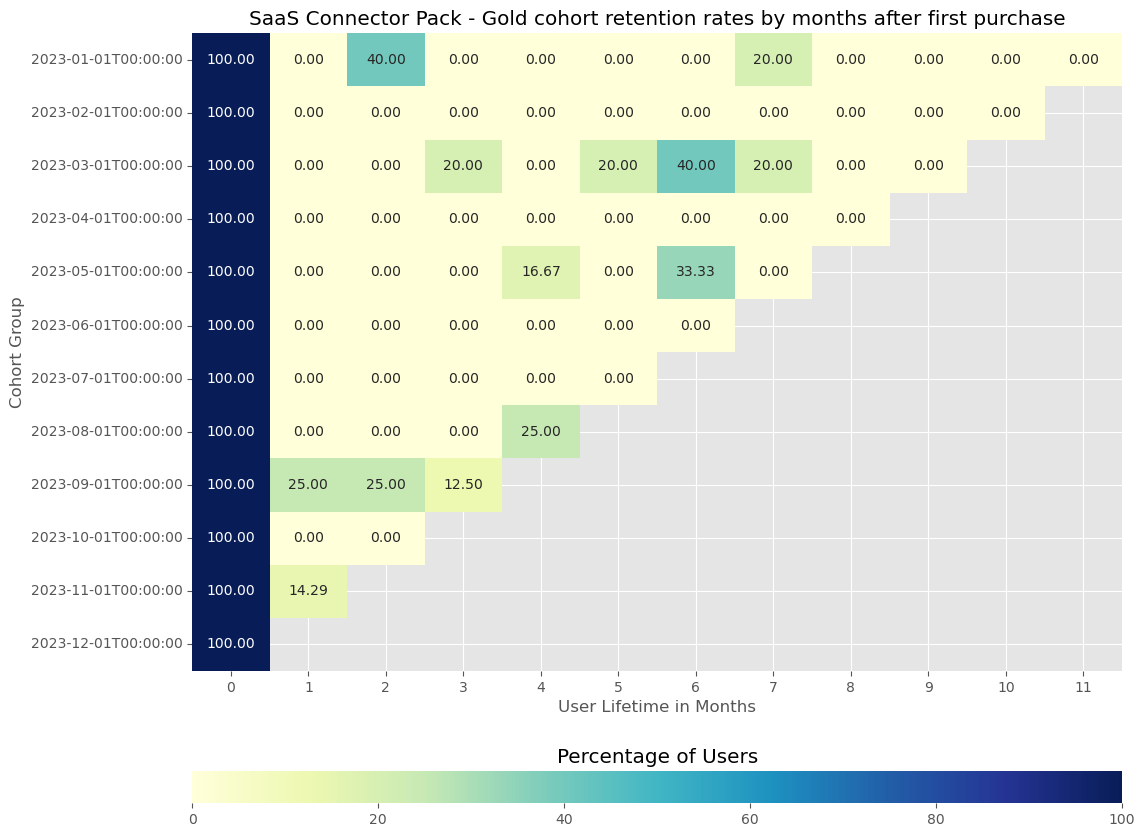

In [19]:
# customer retention
pivot1 =prod13_cohort.pivot_table(index='reg_month', columns='lifetime', values= 'active rate')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot1,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='YlGnBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack - Gold cohort retention rates by months after first purchase',
    xlabel='User Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Percentage of Users'
)

plt.show()

- Generally, as there is no activity beyond the initial purchase, retention rates for all cohorts is 0% . 
- Some users would make return purchases in the cohort's lifetime, but it is relatively rare.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

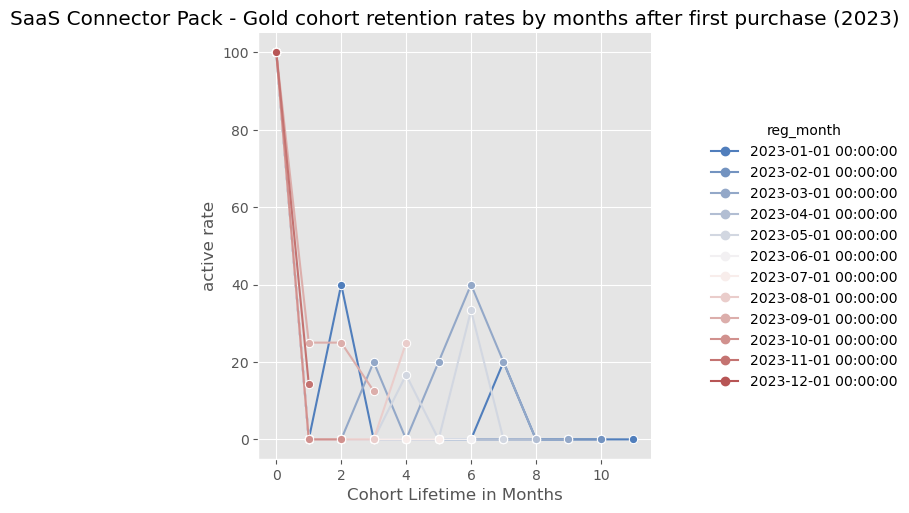

In [20]:
# retention rate lineplots
sns.relplot(data=prod13_cohort, x="lifetime", y="active rate",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('SaaS Connector Pack - Gold cohort retention rates by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

In [17]:
prod13_cohort2 =prod13_2023_user.groupby(['reg_month', 'lifetime'], as_index=False)[['Quantity', 'account', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit']].agg('sum') 

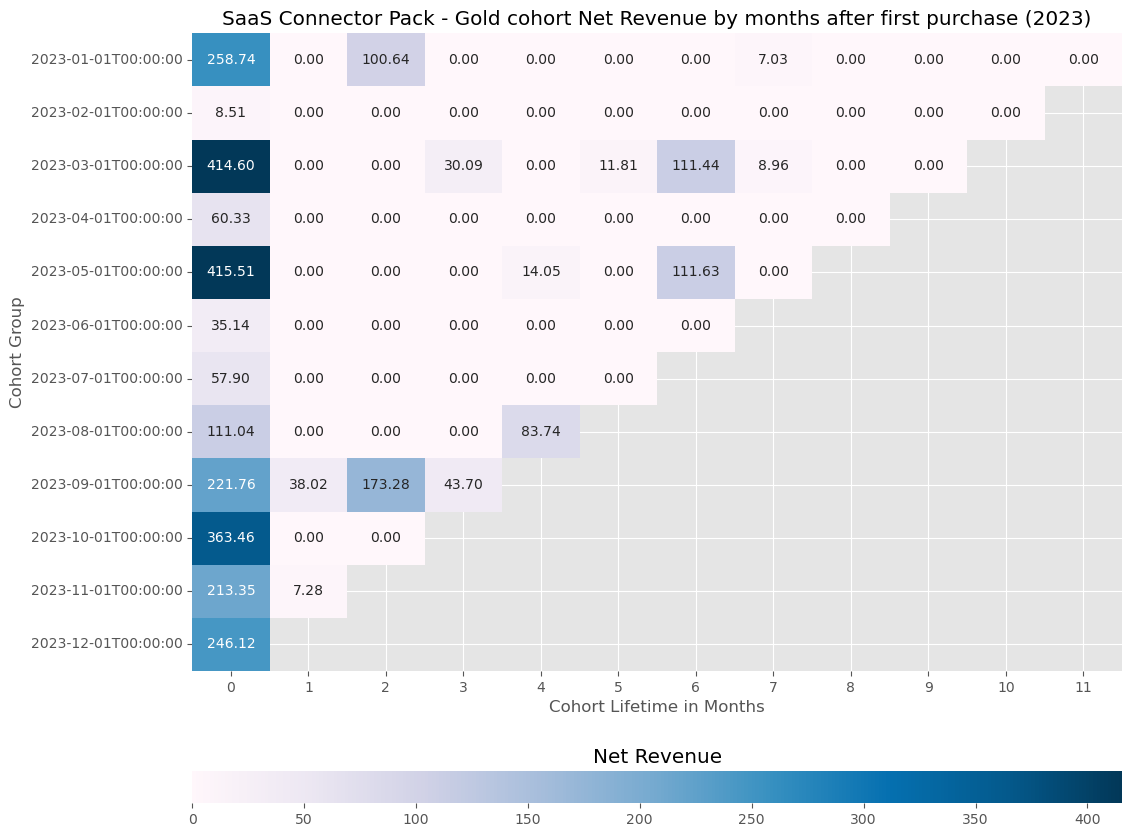

In [22]:
# Net Revenue by Cohort
pivot2 =prod13_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'discounted_sales')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot2,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack - Gold cohort Net Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Revenue'
)

plt.show()

- With no subsequent purchases, each cohort's net revenue value depends on the purchase in initial month.
- May cohort, who has 6 users in the initial month, has the highest initial purchase, at 415.51.

In [18]:
# calculating Net Dollar Retention (NDR), using initial month summed discounted sales
ds_max = prod13_2023_user.loc[prod13_2023_user['lifetime'] <= 0].groupby('reg_month')['discounted_sales'].sum().to_frame('ds_max')
prod13_cohort2 = prod13_cohort2.merge(ds_max,how='left',on=['reg_month'])
prod13_cohort2 ['net dollar retention'] = (prod13_cohort2['discounted_sales'] / prod13_cohort2['ds_max']) * 100

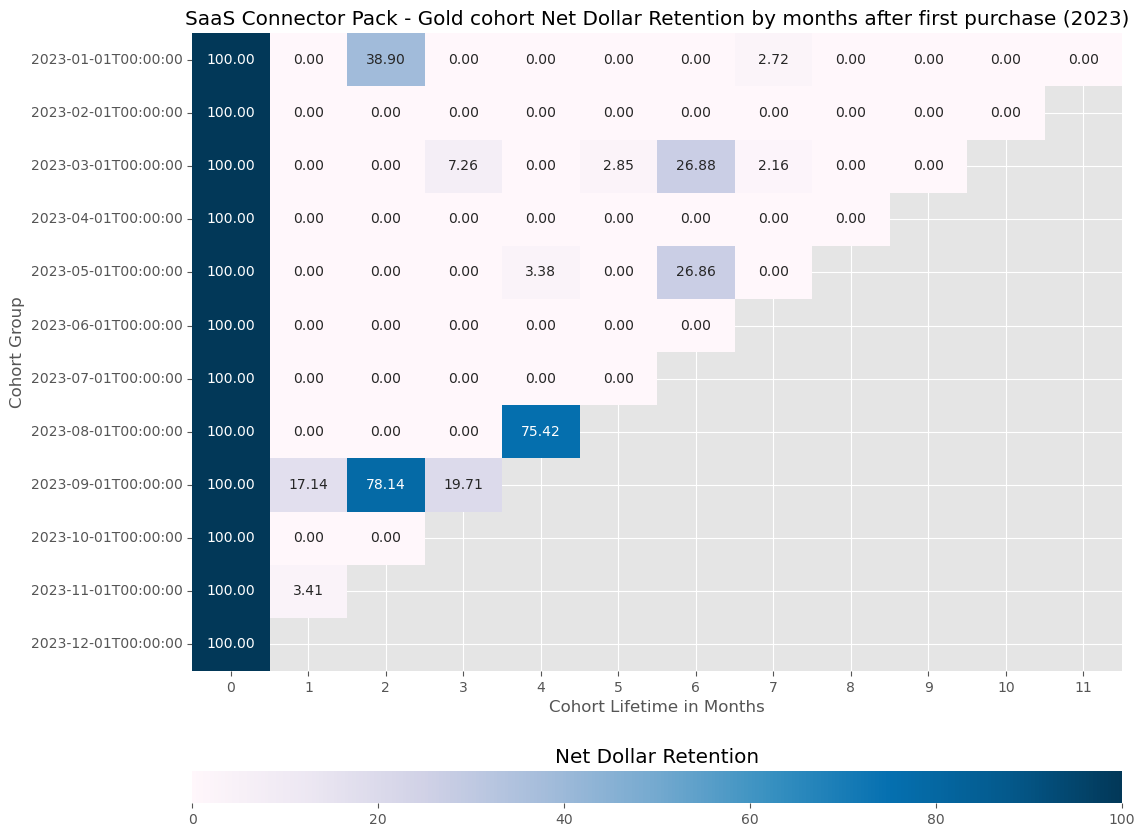

In [24]:
# Net Dollar/Revenue Retention
pivot3 =prod13_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'net dollar retention')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot3,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack - Gold cohort Net Dollar Retention by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Net Dollar Retention'
)

plt.show()

*Notes
- in SaaS, especially B2B, NDR is extremely important. An NDR above 110% are, among other things, signs of underpricing (meaning that your product value is more than you realize, that some companies are getting more value out of your product than the value they could give to you). Its is also a sign of cohort growth, and that companies should try upselling, improving their products and getting more users on top of their growing existing users.
- under 100%, especially for Enterprise-level B2B SaaS, means that there is something wrong. Customer churn, they don't love the product. Rather than trying to get new users (investing in sales and marketing), B2B SaaS should try to ask their customers on why they're churning and invest on product improvement.

- For SaaS Connector Pack - Gold, as there are few subsequent purchases, generally NDR rates are 0%.
- There isn't any months where NDR rates exceed 100% after initial purchase.

In [19]:
prod13_cohort2 ['cumulative lifetime revenue'] = prod13_cohort2.groupby(['reg_month'])['discounted_sales'].cumsum()

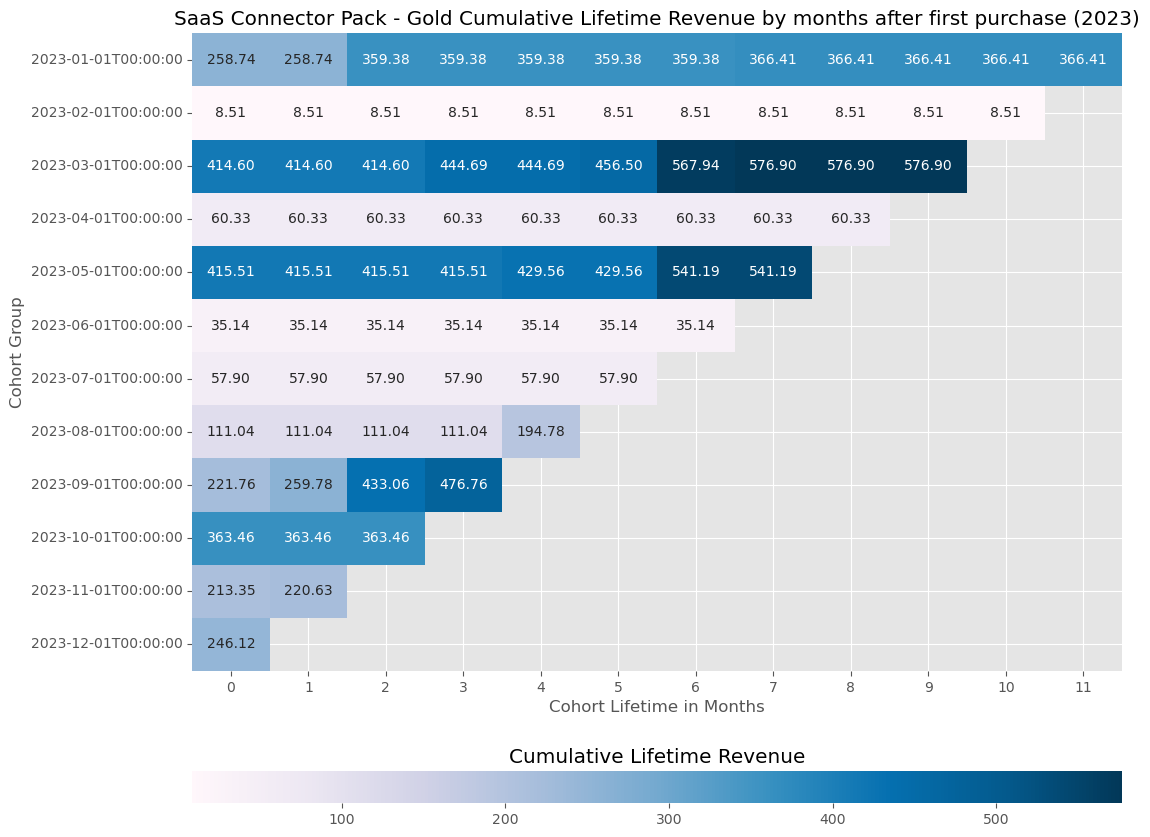

In [26]:
# cumulative lifetime revenue by cohort
pivot4 =prod13_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'cumulative lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot4,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack - Gold Cumulative Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Cumulative Lifetime Revenue'
)

plt.show()

Cumulative lifetime revenue adds up all the revenue purchases starting from the initial purchase, so that by the end of the month (and by subsequents months), you can see totals of revenue purchases.

- For most cohorts there is little to no subsequent purchases, and its cumulative revenue remains relatively stagnant, its value being determined largely only the initial purchase.

In [20]:
# calculating Customer Lifetime Revenue, using initial month number of active users
user_max = prod13_2023_user.loc[prod13_2023_user['lifetime'] <= 0].groupby('reg_month')['active'].sum().to_frame('user_max')
prod13_cohort2 = prod13_cohort2.merge(user_max,how='left',on=['reg_month'])
prod13_cohort2 ['customer lifetime revenue'] = (prod13_cohort2['cumulative lifetime revenue'] / prod13_cohort2['user_max'])

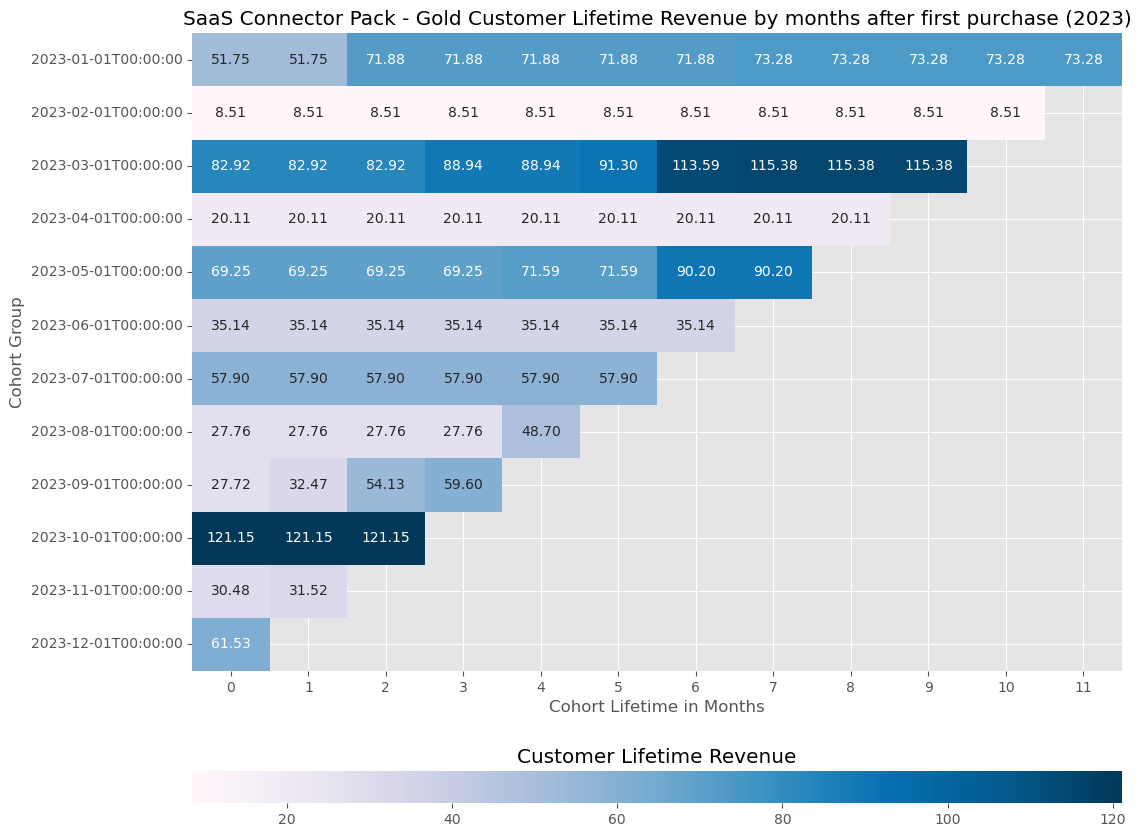

In [28]:
# per user Customer Lifetime Revenue, by cohort
pivot5 =prod13_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'customer lifetime revenue')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot5,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBu',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack - Gold Customer Lifetime Revenue by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Revenue'
)

plt.show()

Customer Lifetime Revenue gives an average of how much each customer in the cohort spends each month (on a per-customer basis).

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

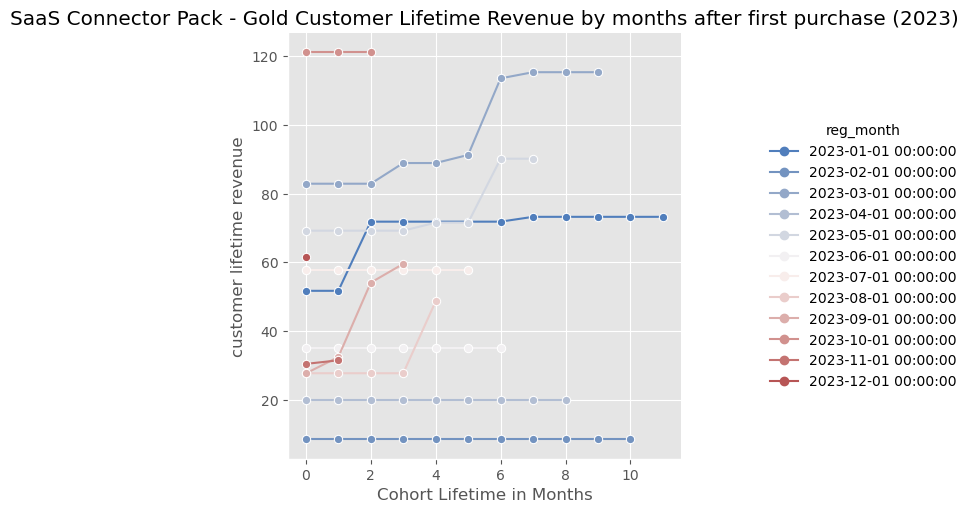

In [46]:
#  customer lifetime revenue lineplots
sns.relplot(data=prod13_cohort2, x="lifetime", y="customer lifetime revenue",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('SaaS Connector Pack - Gold Customer Lifetime Revenue by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

- Generally there is little to no subsequent user purchases across all cohorts, with users in cohorts generally having 1 or 2 purchases after the initial purchase, if at all. With subsequent purchases being marginal in value (if they occur), per user value is mostly dependent on the initial month's value.
- On a per customer basis, the highest can be observed in the October cohort, as it's initial user value on average is around 121.15.  

In [21]:
# CLV - but with net profit
prod13_cohort2 ['cum_net_profit'] = prod13_cohort2.groupby(['reg_month'])['net_profit'].cumsum()
# calculating Customer Lifetime Value, using initial month number of active users
prod13_cohort2 ['Customer Lifetime Value'] = (prod13_cohort2['cum_net_profit'] / prod13_cohort2['user_max'])

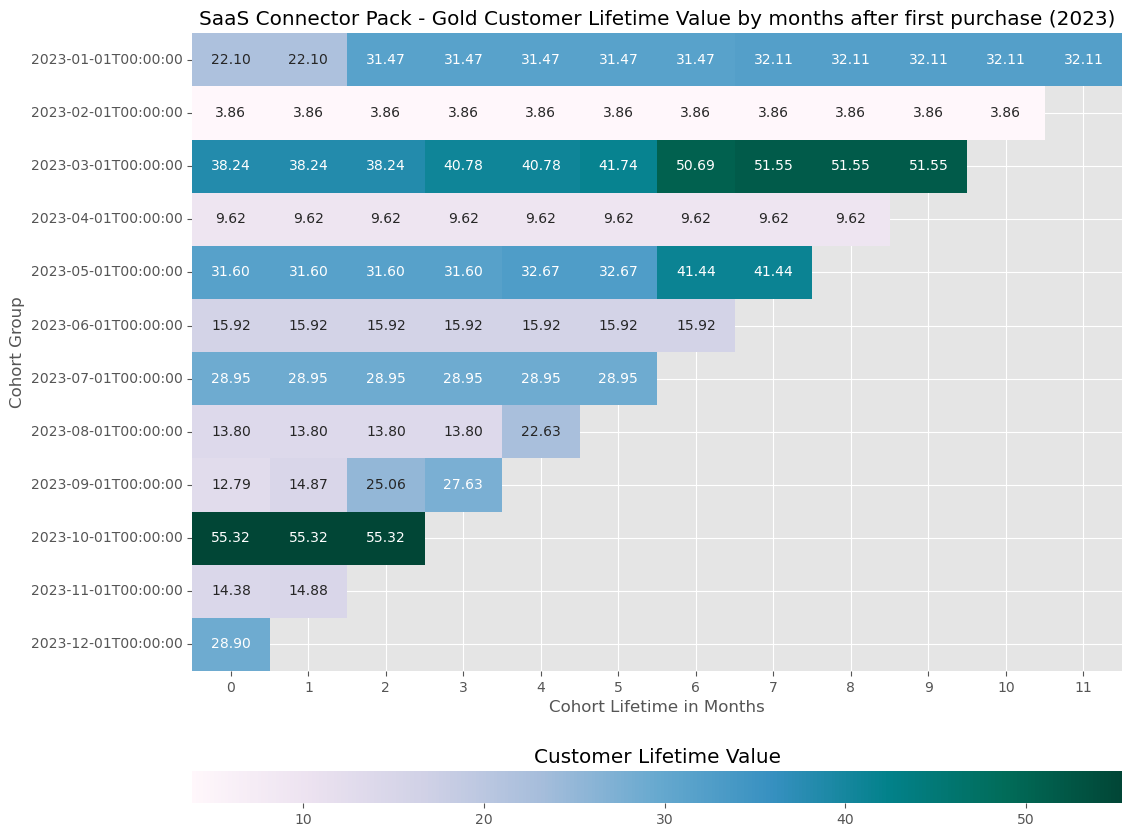

In [30]:
# Customer Lifetime Value, by cohort
pivot6 =prod13_cohort2.pivot_table(index='reg_month', columns='lifetime', values= 'Customer Lifetime Value')

fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(12, 10),
                            gridspec_kw={
                                'height_ratios': (20, 1),   
                                'hspace':0.3                
                            }
                        )

sns.heatmap(
    pivot6,
    annot=True,         # menambahkan anotasi
    fmt='.2f',          # mengubat format anotasi
    cmap='PuBuGn',      # mengatur warna
    ax=ax_top,          # penempatan heatmap pada ax_top
    cbar_ax=ax_bot,     # penempatan color bar pada ax_bot
    cbar_kws={'orientation': 'horizontal'}
)

ax_top.set(
    title='SaaS Connector Pack - Gold Customer Lifetime Value by months after first purchase (2023)',
    xlabel='Cohort Lifetime in Months',
    ylabel='Cohort Group'
)

ax_bot.set(
    title='Customer Lifetime Value'
)

plt.show()

>Notes
>- Customer Lifetime Value (CLV), looks at profit instead of revenue, on a per user basis.
>- Usually, "profit" used in CLV calculation is Gross Profit, which is Revenue - Cost of Goods (cost of producing a product). Gross Profit is used to get Gross Margin rate (Gross Profit/Revenue), which then is multiplied with the Customer Lifetime Revenue to get the CLV values. CLV then reflect the profit gained on a per-user basis, after considering the production cost of a product.
>- In this dataset, however, there is no Cost of Goods Sold (COGS) data or any "expenses" data. We only have "net profit" which is Gross Profit - Other Expenses (marketing, overhead cost, taxes, etc), and so will use that in place of Gross Profit. So CLV here will be profit gained on a per-user basis after considering ALL expenses, including those not related to production cost. 
>- Lumping all expenses together may simplify things, but can provide distortion of data and less insights in real world cases. In SaaS, usually expenses not relating to production cost is related to Customer Acquisition Cost (CAC), and is used to calculate actual profit from users or customers. With CAC, you can ask questions such as: how much can we spend on getting customers, when we have a profit of ... from producing a product? Or, within context of this dataset, how much discount can we afford to actually make the most profit?

>Without expenses data, it is harder to gain accurate insights on profit and how to be accountable with profit, but its the data we have.

Text(0.5, 29.999999999999986, 'Cohort Lifetime in Months')

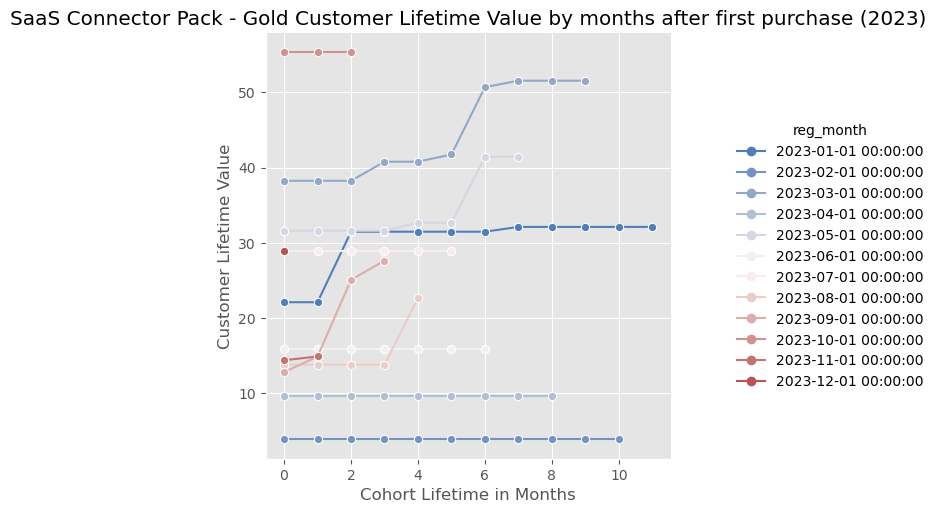

In [22]:
#  customer lifetime value lineplots
sns.relplot(data=prod13_cohort2, x="lifetime", y="Customer Lifetime Value",  marker='o', hue="reg_month", kind="line", palette= sns.color_palette("vlag", 12))
plt.title('SaaS Connector Pack - Gold Customer Lifetime Value by months after first purchase (2023)')
plt.xlabel('Cohort Lifetime in Months')

-  It can be observed that there are no negative profit values per user in the cohorts, meaning that SaaS Connector Pack - Gold is contributing to profit.
- Though October cohort provide the highest profits from all the cohorts per user (55.32), we can see that per user values are quite stagnant, as purchases are only made in the initial month. Instead, March cohort has had a relatively more active per user purchases from its initial month (38.24), accumulating to 51.55 in per user value by December. Based on the CLV, March cohort show the most promise. However, since this CLV value is made using net profit instead of gross profit, here Costumer Acquisition Cost (CAC) is assumed to be already accounted for. Usually, CLV values (calculated with gross profit) is measured against CAC to see the actual value of a customer. Since CAC data doesn't exist in this dataset and is taked as granted, CLV of March cohort should not be taken at face value. Just for estimation purposes.

**Key findings:**
1. Generally for most cohorts, there is no activity beyond the initial purchase (general retention rate is 0%, general NDR rates are 0%).
2. With no subsequent purchases, each cohort's net revenue value depends on the purchase in initial month. May cohort, who has 6 users in the initial month, has the highest initial purchase, at 415.51.
3. On a per-user basis profit-wise, March cohort has had a relatively more active per user purchases than other cohorts, accumulating from 38.24 to 51.55 in CLV by December.
4. There are no negative profit values in all cohorts for SaaS Connector Pack - Gold.


### Profitability

In [16]:
# calculating good & bad sales; positive and negative profit before discount was applied
pre_discount_negatives= prod13_2023[prod13_2023['(net)_profit_before_discount'] < 0]
pre_discount_positives= prod13_2023[prod13_2023['(net)_profit_before_discount'] > 0]
# negative profit
negatives = pre_discount_negatives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
negatives.columns = ['month', 'negative profits before discount']
# positive profit
positives = pre_discount_positives.groupby('month')['(net)_profit_before_discount'].sum().reset_index()
positives.columns = ['month', 'positive profits before discount']
# merge
plus_minus = pd.merge(negatives, positives, on='month', how='outer')
plus_minus
# turn negative values to positive for easier visuals
plus_minus['negative profits before discount'] = plus_minus['negative profits before discount'].abs()
# sort by month to ensure correct order
plus_minus = plus_minus.sort_values(by='month')

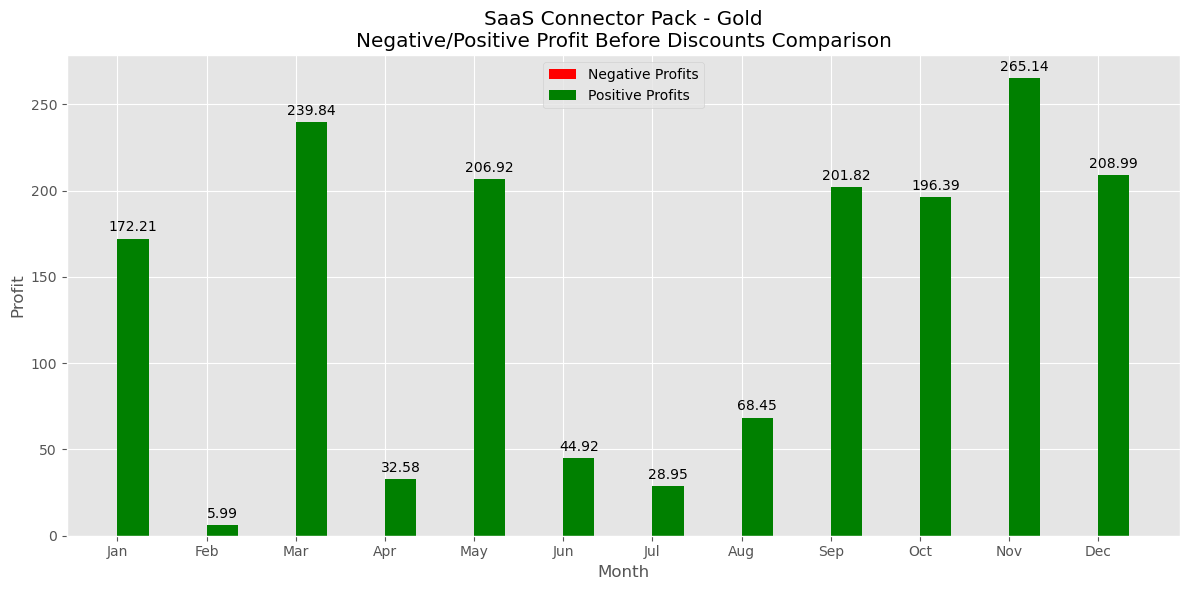

In [16]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(plus_minus['month']))

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width/2, plus_minus['negative profits before discount'], bar_width, label='Negative Profits', color='r')
bar2 = plt.bar(index + bar_width/2, plus_minus['positive profits before discount'], bar_width, label='Positive Profits', color='g')

# Annotate bars
for rect in bar1 + bar2:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('SaaS Connector Pack - Gold\nNegative/Positive Profit Before Discounts Comparison')
plt.xticks(ticks=np.arange(len(plus_minus)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

**Key findings:**
1. Before discounts, the financial health of SaaS Connector Pack - Gold fluctuates, but profits remain positive every month. Some months show concerning dips.
2. February had a severe dip of 5.9850, which rose sharply to 239.8407 in March, then dip back to 32.5836 in April.
3. Lower positive profits observed in summer months; June (44.9193), July (28.9500), and August (68.4538).
4. Profits rose steadily from September (201.8162), peaked in November (265.1420), and slightly decreased but remained strong in December (208.9899).

### Discounting EDA

In [19]:
# profits that went negative because of discount + positive profits after discount 
post_discount_negatives = prod13_2023[(prod13_2023['net_profit'] < 0)]
post_discount_positives = prod13_2023[(prod13_2023['net_profit'] > 0)]
# negative profit
negatives2 = post_discount_negatives.groupby('month')['net_profit'].sum().reset_index()
negatives2.columns = ['month', 'negative profits after discount']
# positive profit
positives2 = post_discount_positives.groupby('month')['net_profit'].sum().reset_index()
positives2.columns = ['month', 'positive profits after discount']
# merge
plus_minus2 = pd.merge(negatives2, positives2, on='month', how='outer')
plus_minus2
# turn negative values to positive for easier visuals
plus_minus2['negative profits after discount'] = plus_minus2['negative profits after discount'].abs()
# Sort by month to ensure correct order
plus_minus2 = plus_minus2.sort_values(by='month')

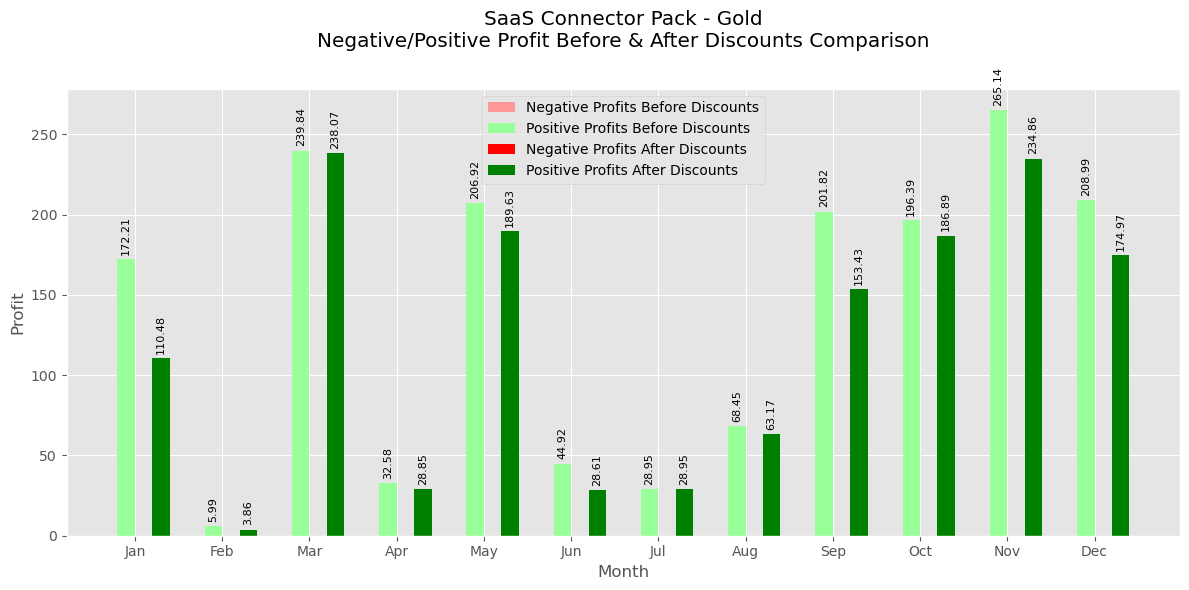

In [19]:
# Plotting the bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(plus_minus['month']))

# Lighter shades of red and green
lighter_green = '#99ff99'
lighter_red = '#ff9999'

# Plot negative and positive profits side-by-side
bar1 = plt.bar(index - bar_width*1.5, plus_minus['negative profits before discount'], bar_width, label='Negative Profits Before Discounts', color=lighter_red)
bar2 = plt.bar(index - bar_width*0.5, plus_minus['positive profits before discount'], bar_width, label='Positive Profits Before Discounts', color=lighter_green)
bar3 = plt.bar(index + bar_width*0.5, plus_minus2['negative profits after discount'], bar_width, label='Negative Profits After Discounts', color='r')
bar4 = plt.bar(index + bar_width*1.5, plus_minus2['positive profits after discount'], bar_width, label='Positive Profits After Discounts', color='g')

# Annotate bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height() 
    plt.annotate(f'{height:.2f}',
                 xy=(rect.get_x() + rect.get_width() / 2, height), 
                 xytext=(0, 3), # 3 points vertical offset 
                 textcoords='offset points', ha='center', va='bottom', fontsize=8, rotation=90)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('SaaS Connector Pack - Gold\nNegative/Positive Profit Before & After Discounts Comparison',  pad=30)
plt.xticks(ticks=np.arange(len(plus_minus2)), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=0)
plt.legend(loc='upper center')

# Show plot
plt.tight_layout()
plt.show()

- After discounts have been accounted for, positive profits are reduced for most months. January and September are months the most impacted by discounts, with positive profits decreasing by 61.7312 and 48.3840, respectively.
- Discounting has not severely affected any months, with all months maintaining positive profits. For instance, even in February, the lowest month, profits remained positive at 5.9850 before discounts and 3.8570 after discounts. March, one of the most profitable periods, saw only a slight decline in its profits after discounts (1.77), becoming the most profitable month at 238.07.
- Effects of discounting are minimal, as all months maintain positive profits. However, the low profits for some months, such as February, suggest that the discounts failed to significantly boost sales during those periods. Sales could be related to other factors, such as market demand, seasonality, or marketing effectiveness. Minimal impact of discounting on sales could also suggest competition with similar products in the product line, such as the standard SaaS Connector Pack, which targets the same customer base.

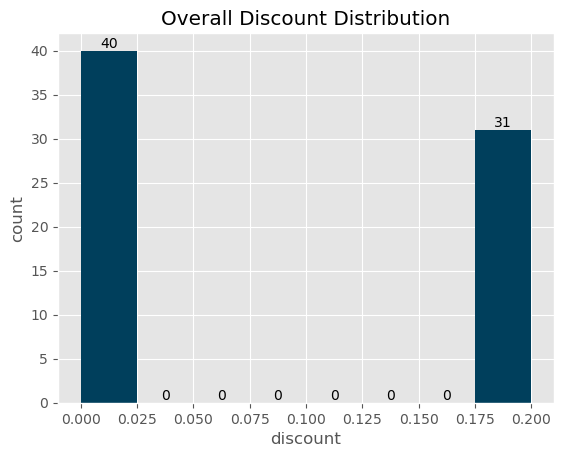

In [21]:
n, bins, patches = plt.hist(data=prod13_2023, x='Discount', bins=8, color='#003f5c')
plt.title('Overall Discount Distribution')
plt.xlabel('discount')
plt.ylabel('count')
# Annotating the bars with count values
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(), 
             str(int(patches[i].get_height())), ha='center', va='bottom', color='black')
plt.show()

- There were 71 invoices for SaaS Connector Pack - Gold in 2023, 31 of which were applied discounts (~ 44%). Lower percentage of discounts suggests a controlled approach, possibly aimed at maintaining profit margins while still offering some incentives to attract or retain customers. 
- 31 orders had a 20% discount, the only type offered for SaaS Connector Pack - Gold. This uniform approach has been effective.

In [24]:
# Range of Discounts (January, February, March, September, November)
filtered_df = prod13_2023[prod13_2023['month'].isin([1, 2, 3, 9, 11])]

# Aggregate statistics
grouped_data = filtered_df.groupby(['month', 'Discount'])[['net_profit']].agg(['std', 'mean', 'min', 'median', lambda x: x.quantile(0.75), 'max', 'count']).rename(columns={'<lambda_0>': '.75'})

# Flatten the multi-level columns for easier handling
grouped_data.columns = ['std', 'mean', 'min', 'median', '75%', 'max', 'count']
grouped_data = grouped_data.reset_index()

# display
grouped_data.set_index(['month', 'Discount'], inplace=True)
grouped_data.sort_index(level=0, inplace=True)
grouped_data

std    mean    min  median     75%      max  count
month Discount                                                       
1     0.0000    2.7798  2.9244 0.9588  2.9244  3.9072   4.8900      2
      0.2000   48.2976 34.8766 6.6468  7.3386 48.9915  90.6444      3
2     0.2000       NaN  3.8570 3.8570  3.8570  3.8570   3.8570      1
3     0.0000   54.7744 39.1985 7.0150 20.8637 25.9546 149.8956      6
      0.2000       NaN  2.8782 2.8782  2.8782  2.8782   2.8782      1
9     0.0000   10.7087 12.0221 3.9102  9.5419 10.9444  33.0648      6
      0.2000   10.7148 10.1624 1.6524  7.6154  9.0066  35.8900      8
11    0.0000   27.6761 25.5949 2.6068  8.3700 37.1360  78.9412      7
      0.2000   10.5332 11.1386 2.8782  4.4312 20.8440  24.3180      5

- A 0% discount consistently maintains positive profit levels, demonstrating its reliability and steady financial performance. For instance, in January, the 0% discount has a lower variability (standard deviation: 2.7798) and mean profit (2.9244) compared to the 20% discount (standard deviation: 48.2976, mean: 34.8766), but it is more stable. In September, both discounts have similar variability (standard deviations: 10.7087 for 0% and 10.7148 for 20%), with the 0% discount showing a slightly higher mean profit (12.0221 vs. 10.1624). In December, the 0% discount has higher variability (21.8583) and mean profit (21.4450) compared to the 20% discount (6.9399 and 7.6906).
- A 20% discount shows mixed results. In January, it has higher variability (standard deviation: 48.2976) and higher mean profit (34.8766) than a 0% discount. September shows similar variability (standard deviation: 10.7148) with a mean profit of 10.1624. In December, it has lower variability (standard deviation: 6.9399) and lower mean profit (7.6906) than a 0% discount. Overall, it offers higher profits sometimes but with more fluctuation, though it can be more stable in months like December.
- In conclusion, no discounts is reliable and still maintains steady profits despite variability, while a 20% discount can yield higher profits but is less consistent and more fluctuating, although it can be more stable in some months like December. 

**Key findings:**
1. There were 71 invoices for SaaS Connector Pack - Gold in 2023, 31 of which were applied discounts (~ 44%). All discounted orders are applied 20% discounts.
2. Discounting strategy has been effective, as all months remain profitable. March is the top month with profits at 238.07. January and September are hit hardest, with reductions of around 62 and 48  but still retain strong profits at 110.48 and 153.43.
3. No discounting is still reliable and maintains steady profits despite variability. Meanwhile, a 20% discount can yield higher profits but is less consistent and more fluctuating (although it can be more stable in some months like December where orders are generally higher). 

### Segmentation EDA

In [7]:
# make a segment df, from the product df
prod13_2023_segment = prod13_2023.groupby(['Segment'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
segment_account = prod13_2023.groupby(['Segment'])[['Order ID']].nunique().reset_index()
segment_account.columns = ['Segment','account']
prod13_2023_percents = segment_account.merge(prod13_2023_segment,how='left',on=['Segment'])
prod13_2023_percents

,Segment,account,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,Enterprise,13,46,530.6120,473.6696,269.0157,212.0733
1,SMB,27,97,1564.0580,1451.2484,774.9282,662.1186
2,Strategic,31,98,1283.9040,1223.2112,628.2599,567.5671


In [8]:
# calculate percentage of segment's business share by category
prod13_2023_percents['% Account']= prod13_2023_percents['account'] / prod13_2023_percents['account'].sum() *100
prod13_2023_percents['% Quantity']= prod13_2023_percents['Quantity'] / prod13_2023_percents['Quantity'].sum() *100
prod13_2023_percents['% Sales']= prod13_2023_percents['Sales'] / prod13_2023_percents['Sales'].sum() *100
prod13_2023_percents['% Net Revenue']= prod13_2023_percents['discounted_sales'] / prod13_2023_percents['discounted_sales'].sum() *100  
percents_plot = prod13_2023_percents.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_plot = percents_plot.melt(id_vars='Segment', var_name='Business_Share', value_name='Percent')
percents_plot = percents_plot.groupby(['Segment', 'Business_Share'])['Percent'].sum()
percents_plot = percents_plot.unstack('Segment')
prod13_plot = percents_plot.columns.tolist()

Text(0, 0.5, 'Percent')

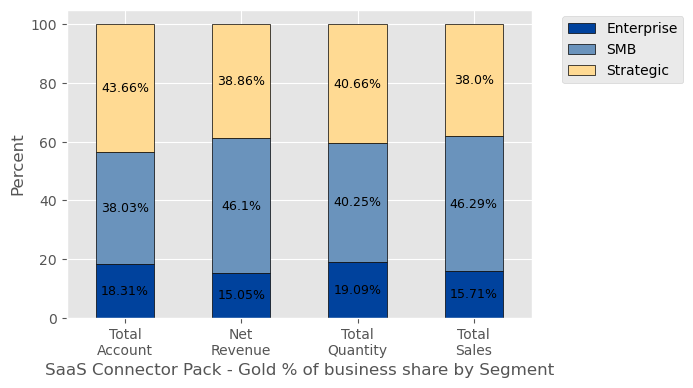

In [35]:
# Segments of Business Share
fig, ax = plt.subplots(figsize = (6, 4))

percents_plot[prod13_plot].plot(kind='bar', ax = ax, stacked=True, color=['#00429d', '#6a93bc', '#ffda93'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('SaaS Connector Pack - Gold % of business share by Segment')
plt.ylabel('Percent')

- In this chart, Customer accounts, quantity of product purchases, sales, and revenue (sales after discounts are applied) for the "SaaS Connector Pack - Gold" product in 2023 are summed and calculated into percentages based on 3 customer segmentation categories: Enterprise, SMB, and Strategic. The goal for this is to somewhat "map" the ideal customer profile (looking for underperforming segments, etc) for SaaS Connector Pack - Gold based on the last year of company activity.
- SMB segment leads in Net Revenue (46.10%), Total Quantity (40.25%), and Total Sales (46.29%), despite having only 38.03% in Total Account.

([0, 1, 2],
 [Text(0, 0, 'Enterprise'), Text(1, 0, 'SMB'), Text(2, 0, 'Strategic')])

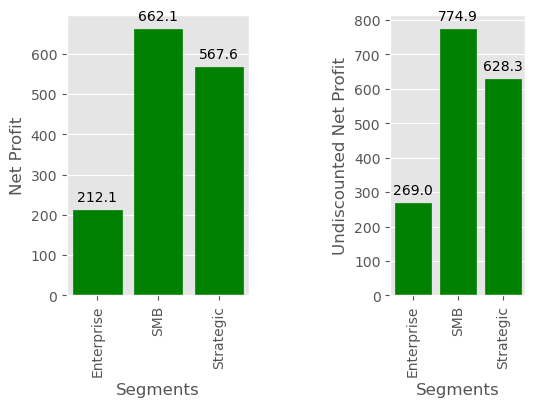

In [36]:
# SaaS Connector Pack - Gold net profit by Segment vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 3, 1)
net_profit_plot = sns.barplot(x='Segment', y='net_profit', data=prod13_2023_segment)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 4, 3)
undiscounted_plot = sns.barplot(x='Segment', y='(net)_profit_before_discount', data=prod13_2023_segment)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Segments')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- SMB segment leads in Net Revenue (46.10%), Total Quantity (40.25%), and Total Sales (46.29%). It also shows the highest Net Profit Before Discount (774.9282) and a substantial positive Net Profit (662.1186), making it the top performer within the SaaS Connector Pack - Gold.
- Strategic segment holds the highest share in Total Accounts (43.66%) and substantial shares in Net Revenue (38.86%) and Total Quantity (40.66%). It demonstrates solid financial performance with a Net Profit Before Discount (628.2599) and a positive Net Profit (567.5671).
- Enterprise segment, while having lower shares compared to the other segments, maintains a consistent presence in Total Accounts (18.31%) and Net Revenue (15.05%). It achieves a positive Net Profit of 212.0733, demonstrating efficient cost management and profitability.

SMB and Strategic segments are key contributors to profitability for the SaaS Connector Pack - Gold, demonstrating strong contributions in both revenue and profitability. The Enterprise segment, although smaller in share, remains profitable and contributes positively to the overall success of the product.

### Further Inquiries on Segments -----------

In [11]:
# Copy-pasted code for Industry queries within segment
# Industries using SaaS Connector Pack - Gold within the SMB Segment
prod13_2023_industry_SMB = prod13_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
SMB_account = prod13_2023.query("Segment == 'SMB'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
SMB_account.columns = ['Industry','account']
prod13_2023_percents_SMB = SMB_account.merge(prod13_2023_industry_SMB,how='left',on=['Industry'])
prod13_2023_percents_SMB['% Account']= prod13_2023_percents_SMB['account'] / prod13_2023_percents_SMB['account'].sum() *100
prod13_2023_percents_SMB['% Quantity']= prod13_2023_percents_SMB['Quantity'] / prod13_2023_percents_SMB['Quantity'].sum() *100
prod13_2023_percents_SMB['% Sales']= prod13_2023_percents_SMB['Sales'] / prod13_2023_percents_SMB['Sales'].sum() *100
prod13_2023_percents_SMB['% Net Revenue']= prod13_2023_percents_SMB['discounted_sales'] / prod13_2023_percents_SMB['discounted_sales'].sum() *100  
percents_SMB = prod13_2023_percents_SMB.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_SMB = percents_SMB.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_SMB = percents_SMB.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_SMB = percents_SMB.unstack('Industry')
prod13_SMB = percents_SMB.columns.tolist()
# Industries using SaaS Connector Pack - Gold within the Strategic Segment
prod13_2023_industry_Strategic = prod13_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Strategic_account = prod13_2023.query("Segment == 'Strategic'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Strategic_account.columns = ['Industry','account']
prod13_2023_percents_Strategic = Strategic_account.merge(prod13_2023_industry_Strategic,how='left',on=['Industry'])
prod13_2023_percents_Strategic['% Account']= prod13_2023_percents_Strategic['account'] / prod13_2023_percents_Strategic['account'].sum() *100
prod13_2023_percents_Strategic['% Quantity']= prod13_2023_percents_Strategic['Quantity'] / prod13_2023_percents_Strategic['Quantity'].sum() *100
prod13_2023_percents_Strategic['% Sales']= prod13_2023_percents_Strategic['Sales'] / prod13_2023_percents_Strategic['Sales'].sum() *100
prod13_2023_percents_Strategic['% Net Revenue']= prod13_2023_percents_Strategic['discounted_sales'] / prod13_2023_percents_Strategic['discounted_sales'].sum() *100  
percents_Strategic = prod13_2023_percents_Strategic.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Strategic = percents_Strategic.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Strategic = percents_Strategic.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Strategic = percents_Strategic.unstack('Industry')
prod13_Strategic = percents_Strategic.columns.tolist()
# Industries using SaaS Connector Pack - Gold within the Enterprise Segment
prod13_2023_industry_Enterprise = prod13_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
Enterprise_account = prod13_2023.query("Segment == 'Enterprise'").groupby(['Industry'])[['Order ID']].nunique().reset_index()
Enterprise_account.columns = ['Industry','account']
prod13_2023_percents_Enterprise = Enterprise_account.merge(prod13_2023_industry_Enterprise,how='left',on=['Industry'])
prod13_2023_percents_Enterprise['% Account']= prod13_2023_percents_Enterprise['account'] / prod13_2023_percents_Enterprise['account'].sum() *100
prod13_2023_percents_Enterprise['% Quantity']= prod13_2023_percents_Enterprise['Quantity'] / prod13_2023_percents_Enterprise['Quantity'].sum() *100
prod13_2023_percents_Enterprise['% Sales']= prod13_2023_percents_Enterprise['Sales'] / prod13_2023_percents_Enterprise['Sales'].sum() *100
prod13_2023_percents_Enterprise['% Net Revenue']= prod13_2023_percents_Enterprise['discounted_sales'] / prod13_2023_percents_Enterprise['discounted_sales'].sum() *100  
percents_Enterprise = prod13_2023_percents_Enterprise.drop(['account','Quantity', 'Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit'], axis=1)
percents_Enterprise = percents_Enterprise.melt(id_vars='Industry', var_name='Business_Share', value_name='Percent')
percents_Enterprise = percents_Enterprise.groupby(['Industry', 'Business_Share'])['Percent'].sum()
percents_Enterprise = percents_Enterprise.unstack('Industry')
prod13_Enterprise = percents_Enterprise.columns.tolist()

##### SMB Segment Notes

Text(0, 0.5, 'Percent')

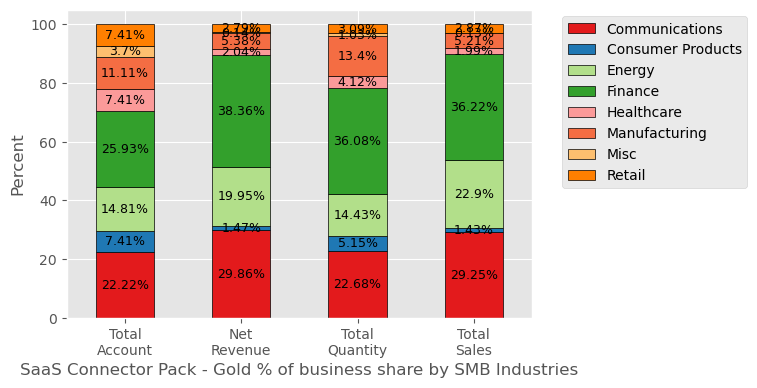

In [38]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_SMB[prod13_SMB].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('SaaS Connector Pack - Gold % of business share by SMB Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (25.93%), Net Revenue (38.36%), Total Quantity (36.08%), and Total Sales (36.22%), indicating a dominant presence in the SMB segment.
- Communications industry holds significant shares in Net Revenue (29.86%) and Total Sales (29.25%), with a substantial presence in Total Accounts (22.22%).
- Energy industry shows strong performance with notable shares in Net Revenue (19.95%), Total Quantity (14.43%), and Total Sales (22.90%).
- Manufacturing maintains a consistent presence across categories, contributing to Total Accounts (11.11%) and Net Revenue (5.38%).
- Healthcare, Retail, and Consumer Products industries have lower shares across categories but maintain a presence in the segment.
- Misc industry shows the lowest shares across categories.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Misc'),
  Text(7, 0, 'Retail')])

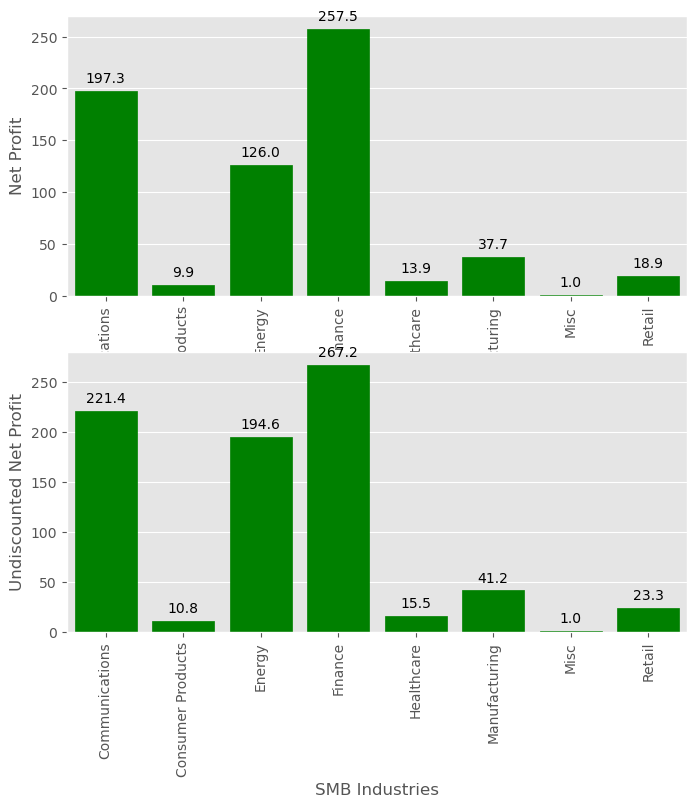

In [39]:
# SaaS Connector Pack - Gold net profit by SMB Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod13_2023_industry_SMB)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod13_2023_industry_SMB)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('SMB Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads the SMB segment in Total Accounts (25.93%), Net Revenue (38.36%), Total Quantity (36.08%), and Total Sales (36.22%). It also shows the highest Net Profit Before Discount (267.1856) and a substantial positive Net Profit (257.4992), making it the top performer.
- Communications industry holds significant shares in Net Revenue (29.86%) and Total Sales (29.25%), achieving a strong Net Profit Before Discount (221.4201) and a positive Net Profit (197.2729).
- Energy industry shows solid performance with notable shares in Net Revenue (19.95%), Total Quantity (14.43%), and Total Sales (22.90%), with a positive Net Profit of 125.9836.
- Manufacturing contributes consistently across categories, achieving a positive Net Profit of 37.7137.
- Healthcare, Retail, and Consumer Products industries have lower shares but maintain positive net profits, indicating profitability in the segment.
- Misc industry, despite the smallest share, achieves a positive Net Profit of 0.9588.

Finance, Communications, and Energy industries are key contributors to profitability within the SMB segment of the SaaS Connector Pack - Gold, demonstrating strong contributions in both revenue and profitability. The Manufacturing industry also shows positive financial performance, while Healthcare, Retail, and Consumer Products maintain a presence and contribute positively. The Misc industry, although smaller in share, remains profitable.

##### Strategic Segment Notes

Text(0, 0.5, 'Percent')

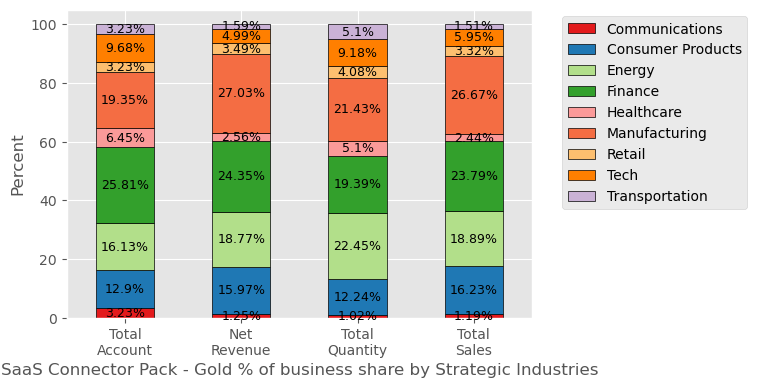

In [40]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Strategic[prod13_Strategic].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('SaaS Connector Pack - Gold % of business share by Strategic Industries')
plt.ylabel('Percent')

- Finance industry leads in Total Accounts (25.81%) and contributes significantly to Net Revenue (24.35%) and Total Sales (23.79%).
- Manufacturing industry holds the highest share in Net Revenue (27.03%) and Total Sales (26.67%), with a substantial presence in Total Accounts (19.35%) and Total Quantity (21.43%).
- Energy industry shows strong performance with notable shares in Net Revenue (18.77%), Total Quantity (22.45%), and Total Sales (18.89%).
- Consumer Products industry maintains a significant presence with 12.90% of Total Accounts, contributing 15.97% to Net Revenue and 16.23% to Total Sales.
- Tech, Healthcare, Retail, and Transportation industries have moderate to lower shares across categories, but they still maintain a presence in the segment.
- Communications industry has the lowest shares across the categories but maintains a presence.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

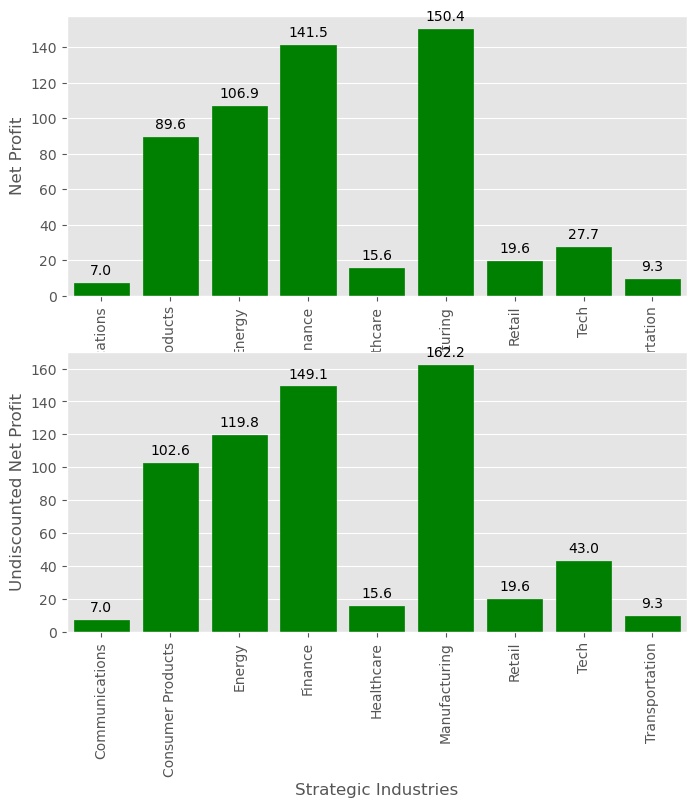

In [41]:
# SaaS Connector Pack - Gold net profit by Strategic Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod13_2023_industry_Strategic)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod13_2023_industry_Strategic)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Strategic Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Finance industry leads in Total Accounts (25.81%), Net Revenue (24.35%), and Total Sales (23.79%), showing strong financial performance with the highest Net Profit Before Discount (149.1002) and a substantial positive Net Profit (141.4970).
- Manufacturing holds the highest share in Net Revenue (27.03%) and Total Sales (26.67%), achieving a significant Net Profit Before Discount (162.2038) and a positive Net Profit (150.3990).
- Energy industry shows solid performance with notable shares in Net Revenue (18.77%), Total Quantity (22.45%), and Total Sales (18.89%), with a positive Net Profit of 106.8759.
- Consumer Products maintains a significant presence, contributing 15.97% to Net Revenue and 16.23% to Total Sales, with a positive Net Profit of 89.5546.
- Tech, Healthcare, Retail, and Transportation industries maintain moderate to lower shares across categories, but all achieve positive net profits.
- Communications industry has the lowest shares across categories but still achieves a positive Net Profit of 7.0150.

Finance, Manufacturing, and Energy industries are key contributors to profitability within the Strategic segment of the SaaS Connector Pack - Gold, demonstrating strong contributions in both revenue and profitability. The Consumer Products industry also shows positive financial performance, while Tech, Healthcare, Retail, and Transportation maintain a presence and contribute positively. The Communications industry, although smaller in share, remains profitable.

##### Enterprise Segment Notes

Text(0, 0.5, 'Percent')

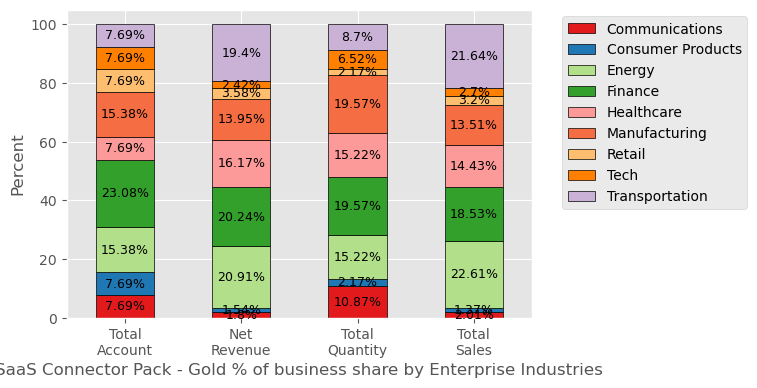

In [42]:
fig, ax = plt.subplots(figsize = (6, 4))

percents_Enterprise[prod13_Enterprise].plot(kind='bar', ax = ax, stacked=True, color=['#e31a1c', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#f46d43', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928', '#2e808d', '#777777'], edgecolor = "black")

for c in ax.containers:
    labels = [str(round(v.get_height(), 2)) + "%" if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 9) # add a container object "c" as first argument
    

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xticks(ticks=np.arange(0,4,1),labels=['Total\nAccount','Net\nRevenue','Total\nQuantity','Total\nSales'])
plt.xlabel('SaaS Connector Pack - Gold % of business share by Enterprise Industries')
plt.ylabel('Percent')

- Finance industry holds the highest share in Total Accounts (23.08%) and contributes significantly to Net Revenue (20.24%) and Total Sales (18.53%).
- Energy industry shows strong performance with notable shares in Net Revenue (20.91%), Total Quantity (15.22%), and Total Sales (22.61%).
- Manufacturing industry maintains a substantial presence across categories, contributing 15.38% to Total Accounts and 13.95% to Net Revenue.
- Healthcare industry also shows consistent shares across categories, contributing 16.17% to Net Revenue and 14.43% to Total Sales.
- Transportation industry holds significant shares in Net Revenue (19.40%) and Total Sales (21.64%), despite having lower Total Accounts (7.69%).
- Retail, Tech, and Communications industries have lower shares across categories but still maintain a presence in the segment.
- Consumer Products industry shows the lowest shares across categories.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Communications'),
  Text(1, 0, 'Consumer Products'),
  Text(2, 0, 'Energy'),
  Text(3, 0, 'Finance'),
  Text(4, 0, 'Healthcare'),
  Text(5, 0, 'Manufacturing'),
  Text(6, 0, 'Retail'),
  Text(7, 0, 'Tech'),
  Text(8, 0, 'Transportation')])

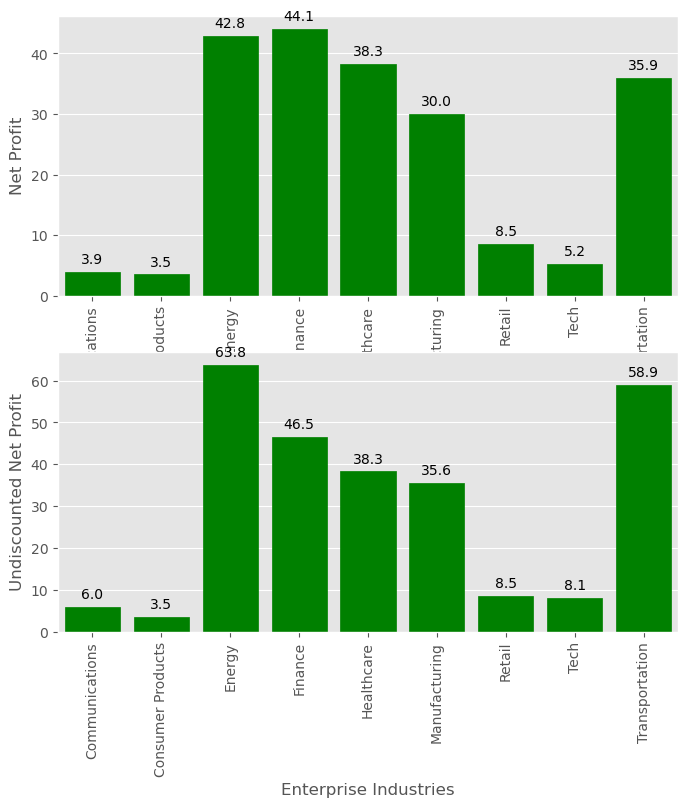

In [43]:
# SaaS Connector Pack - Gold net profit by Enterprise Industries vs before discounted
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Industry', y='net_profit', data=prod13_2023_industry_Enterprise)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
undiscounted_plot = sns.barplot(x='Industry', y='(net)_profit_before_discount', data=prod13_2023_industry_Enterprise)

for p in undiscounted_plot.patches:
    undiscounted_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Enterprise Industries')
plt.ylabel('Undiscounted Net Profit')
plt.xticks(rotation=90)

- Energy industry shows strong performance with the highest shares in Net Revenue (20.91%) and Total Sales (22.61%). It achieves a significant Net Profit Before Discount (63.7527) and a positive Net Profit (42.8167).
- Finance industry holds the highest share in Total Accounts (23.08%) and contributes significantly to Net Revenue (20.24%) and Total Sales (18.53%), showing a strong financial performance with a Net Profit Before Discount (46.4992) and a positive Net Profit (44.0544).
- Transportation industry holds significant shares in Net Revenue (19.40%) and Total Sales (21.64%), achieving a positive Net Profit Before Discount (58.8596) and a positive Net Profit (35.8900).
- Healthcare shows consistent shares across categories, contributing 16.17% to Net Revenue and achieving a positive Net Profit of 38.2900.
- Manufacturing maintains a substantial presence across categories, achieving a positive Net Profit of 29.9782.
- Retail, Tech, and Communications industries have lower shares across categories but still maintain positive net profits.
- Consumer Products industry shows the lowest shares across categories but still achieves a positive Net Profit of 3.4944.

Energy and Finance, industries are key contributors to profitability within the Enterprise segment of the SaaS Connector Pack - Gold, demonstrating strong contributions in both revenue and profitability. Healthcare, Manufacturing, and Transportation industries also show positive financial performance, while Retail, Tech, and Communications maintain a presence and contribute positively. The Consumer Products industry, although smaller in share, remains profitable.

**Key findings:**
1. For the SaaS Connector Pack - Gold, focus on the SMB segment, which leads in Net Revenue (46.10%), Total Quantity (40.25%), and Total Sales (46.29%), with a Net Profit Before Discount of 774.93 and Net Profit of 662.12. Prioritize the Strategic segment as well, as it holds the highest share in Total Accounts (43.66%) and significant shares in Net Revenue (38.86%) and Total Quantity (40.66%), with a Net Profit Before Discount of 628.26 and Net Profit of 567.57. Though of a lesser priority, it is profitable to maintain the Enterprise segment, which achieves a Net Profit Before Discount of 212.07 and Net Profit of 212.07.
2. For the SMB segment, focus primarily on the Finance industry, with secondary focus on Energy and Communications industries.
3. For the Strategic segment, also focus primarily on the Finance industry, with secondary focus on Energy and Manufacturing industries.
4. For the Enterprise segment, also focus primarily on the Finance Industry, with secondary focus on the Energy industry.

### Regional EDA

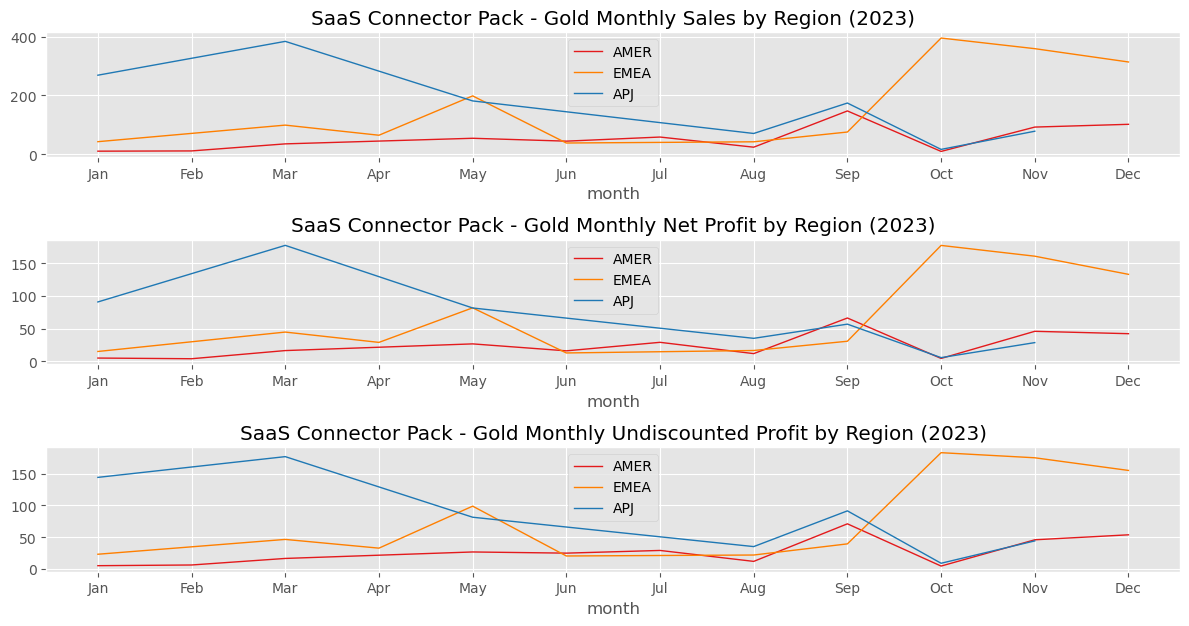

In [7]:
# SaaS Connector Pack - Gold Monthly Income EDA by Region (2023)
prod13_region_month = prod13_2023.groupby(['Region','month'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()
plt.figure(figsize=(12,8))

plt.subplot(411)
prod13_region_month.query("Region == 'AMER'").groupby('month')['Sales'].sum().plot(c='#e31a1c',linewidth=1)
prod13_region_month.query("Region == 'EMEA'").groupby('month')['Sales'].sum().plot(c='#ff7f00',linewidth=1)
prod13_region_month.query("Region == 'APJ'").groupby('month')['Sales'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('SaaS Connector Pack - Gold Monthly Sales by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(412)
prod13_region_month.query("Region == 'AMER'").groupby('month')['net_profit'].sum().plot(c='#e31a1c',linewidth=1)
prod13_region_month.query("Region == 'EMEA'").groupby('month')['net_profit'].sum().plot(c='#ff7f00',linewidth=1)
prod13_region_month.query("Region == 'APJ'").groupby('month')['net_profit'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('SaaS Connector Pack - Gold Monthly Net Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])

plt.subplot(413)
prod13_region_month.query("Region == 'AMER'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#e31a1c',linewidth=1)
prod13_region_month.query("Region == 'EMEA'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#ff7f00',linewidth=1)
prod13_region_month.query("Region == 'APJ'").groupby('month')['(net)_profit_before_discount'].sum().plot(c='#1f78b4',linewidth=1)

plt.title('SaaS Connector Pack - Gold Monthly Undiscounted Profit by Region (2023)')
plt.xticks(ticks=np.arange(1,13,1),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],rotation=0)
plt.legend(['AMER', 'EMEA', 'APJ'])


plt.tight_layout()
plt.show()

Monthly Regional Performance

All regions exhibited significant fluctuations, relying heavily on periodic peaks for their overall performance. APJ stood out with superior performance overall, especially in January and March. As the year progressed, EMEA emerged as the leader with the highest sales in October, November, and December. On the other hand, AMER's performance was consistently lower throughout the year, with noticeable peaks only in September and November.
- AMER's sales and net profits were lower across most months, peaking in September and November.
- EMEA saw moderate sales and profits initially but surged from September onwards, notably in October, November, and December.
- APJ achieved high sales and net profits earlier in the year, particularly standing out in January and March.

Performance Highlights
- Highest Sales: In EMEA, October shows the highest sales of 395.140.
- Highest Net Profit: The highest net profit is seen in APJ, March, with a net profit of 177.1368.
- Highest Undiscounted Profit: APJ in March also shows the highest undiscounted profit at 177.1368.

In [8]:
prod13_region_month

,Region,month,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,1,1,9.7800,9.7800,4.8900,4.8900
1,AMER,2,5,10.6400,8.5120,5.9850,3.8570
2,AMER,3,6,34.6500,34.6500,16.3270,16.3270
3,AMER,5,6,53.7200,53.7200,26.5544,26.5544
4,AMER,6,5,43.9200,35.1360,24.7050,15.9210
5,AMER,7,5,57.9000,57.9000,28.9500,28.9500
6,AMER,8,2,23.3600,23.3600,11.6800,11.6800
7,AMER,9,17,146.8480,141.9584,71.0048,66.1152
8,AMER,10,2,8.9600,8.9600,4.3008,4.3008
9,AMER,11,9,91.8600,91.8600,45.7772,45.7772


([0, 1, 2], [Text(0, 0, 'AMER'), Text(1, 0, 'APJ'), Text(2, 0, 'EMEA')])

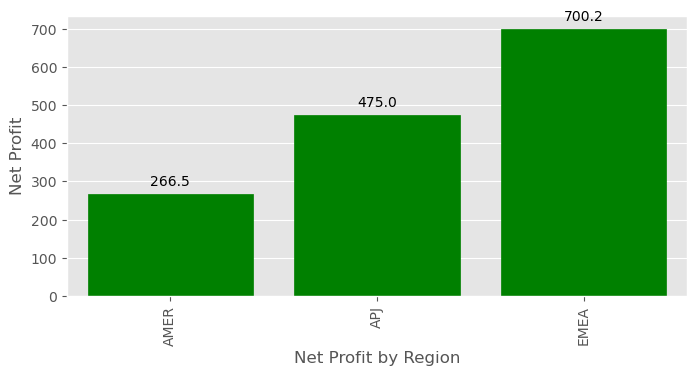

In [9]:
prod13_region = prod13_2023.groupby(['Region'])[['Quantity','Sales', 'discounted_sales', '(net)_profit_before_discount', 'net_profit' ]].agg('sum').reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
net_profit_plot = sns.barplot(x='Region', y='net_profit', data=prod13_region)

for p in net_profit_plot.patches:
    net_profit_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., abs(p.get_height())),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')
    if p.get_height() < 0:
        p.set_color('red')
    else:
        p.set_color('green')

plt.xlabel('Net Profit by Region')
plt.ylabel('Net Profit')
plt.xticks(rotation=90)

In [10]:
prod13_region

,Region,Quantity,Sales,discounted_sales,(net)_profit_before_discount,net_profit
0,AMER,66,582.9140,555.5972,293.8194,266.5026
1,APJ,47,1170.7720,1063.5896,582.1958,475.0134
2,EMEA,128,1624.8880,1528.9424,796.1886,700.2430


High-Performing Region
- EMEA led in both sales and net profit, demonstrating the strongest financial performance. APJ had substantial sales and net profit, securing the second position.
- Early in the year, EMEA showed moderate sales and profits, suggesting room for improvement in early-year strategies. On the other hand, despite its high overall performance, APJ experienced significant fluctuations in sales and profits, particularly during the mid-year months.

Challenging Region
- AMER had the lowest sales and net profit among the three regions.
- Compared to APJ and EMEA, AMER faced challenges in achieving high sales volumes and market presence.

In [8]:
grouped = prod13_2023.groupby(['Region', 'Segment', 'Industry'])
total_sales = grouped['Sales'].sum()
total_profit_before_discounts = grouped['(net)_profit_before_discount'].sum()
total_profit = grouped['net_profit'].sum()
avg_sales_per_order = grouped['Sales'].mean()
avg_discount = grouped['Discount'].mean()
profit_margin = (total_profit / total_sales) * 100

In [9]:
metrics = pd.DataFrame({
    'total_sales': total_sales,
    'avg_sales_per_order': avg_sales_per_order,
    'total_profit': total_profit,
    'total_profit before discounts':total_profit_before_discounts,
    'avg_discount': avg_discount,
    'profit_margin': profit_margin
}).reset_index()

metrics_sorted = metrics.sort_values(by=['Region', 'Segment', 'Industry'])

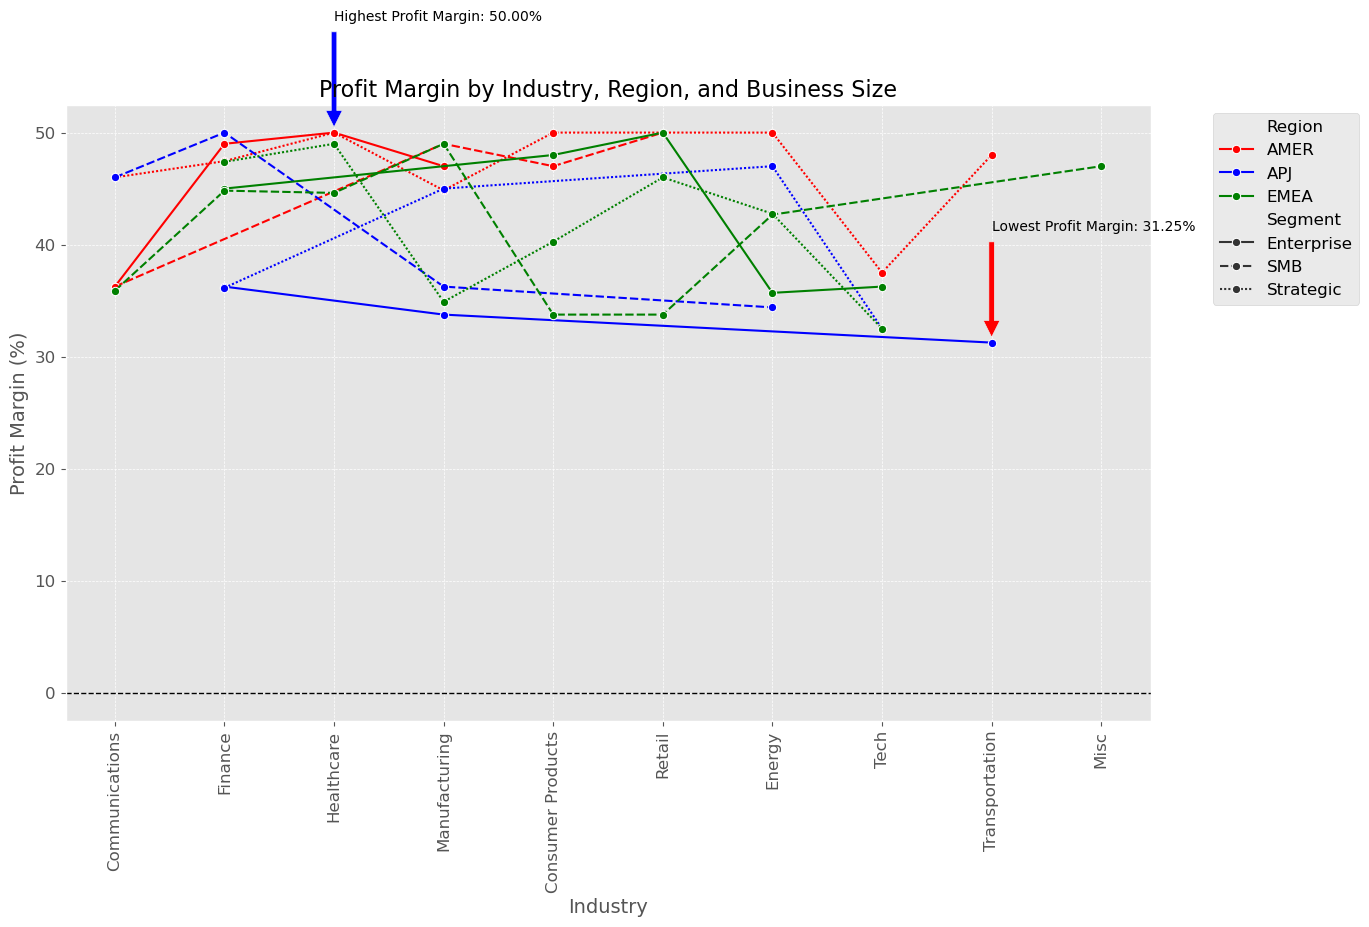

In [11]:
# Cross-segment line chart

# Define the color palette
palette = {
    'AMER': 'red',
    'EMEA': 'green',
    'APJ': 'blue'
}

plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_sorted, x='Industry', y='profit_margin', hue='Region', style='Segment', marker='o', palette=palette)
plt.title('Profit Margin by Industry, Region, and Business Size', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Profit Margin (%)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)

# Add a black grid line at y=0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Highlight highest and lowest profit margins
max_profit = metrics_sorted['profit_margin'].max()
min_profit = metrics_sorted['profit_margin'].min()
max_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == max_profit, 'Industry'].values[0]
min_profit_industry = metrics_sorted.loc[metrics_sorted['profit_margin'] == min_profit, 'Industry'].values[0]

plt.annotate(
    f'Highest Profit Margin: {max_profit:.2f}%', 
    xy=(max_profit_industry, max_profit), 
    xytext=(max_profit_industry, max_profit + 10), 
    arrowprops=dict(facecolor='blue', shrink=0.05)
)

plt.annotate(
    f'Lowest Profit Margin: {min_profit:.2f}%', 
    xy=(min_profit_industry, min_profit), 
    xytext=(min_profit_industry, min_profit + 10), 
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Move legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [12]:
# Calculating the total profit for each group
total_profit = grouped['net_profit'].sum()
avg_discount = grouped['Discount'].mean()
# Creating a DataFrame to store the metrics
metrics = pd.DataFrame({
    'total_profit': total_profit,
    'avg_discount': avg_discount
}).reset_index()
# Filtering the metrics to show only the positive profits
positive_profit_metrics = metrics[metrics['total_profit'] > 0]
# Sorting the metrics DataFrame by Region, Segment, and Industry
metrics_sorted = positive_profit_metrics.sort_values(by=['Region', 'Segment', 'Industry'])


In [13]:
###Filter positive profits (SMB)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the SMB segment
smb_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'SMB')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
smb_positive_profit_metrics = smb_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

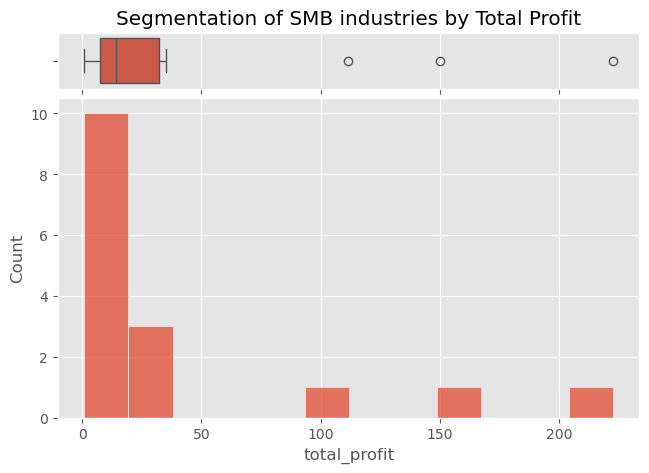

0.0000     0.9588
0.2500     7.4500
0.5000    14.1995
0.7500    32.3522
1.0000   222.4592
Name: total_profit, dtype: float64
Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 100.00 in profit
- 3 (Good) : Contributes between 32.35 and 100.00 in profit
- 2 (Marginal) : Contributes between 14.20 and 32.35 in profit
- 1 (Underperforming) : Contributes less than 14.20 in profit


In [18]:
# Define custom thresholds for segmentation
custom_bins = [0, 14.1995, 32.3522, 100, 222.4592]
custom_labels = [1, 2, 3, 4]

# Apply custom segmentation
smb_positive_profit_metrics['segmentation score'] = pd.cut(
    smb_positive_profit_metrics['total_profit'],
    bins=custom_bins,
    labels=custom_labels,
    include_lowest=True
).astype(int)

# Plotting
fig, (ax_top, ax_bot) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(7.5, 5),
    gridspec_kw={
        'height_ratios': (0.15, 0.85),
        'hspace': 0.05
    }
)

sns.boxplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=smb_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of SMB industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = smb_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group SMB industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {custom_bins[3]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {custom_bins[2]:.2f} and {custom_bins[3]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {custom_bins[1]:.2f} and {custom_bins[2]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {custom_bins[1]:.2f} in profit")

In [19]:
# Define custom quantile ranges for segmentation
custom_bins = [0, 14.1995, 32.3522, 100, smb_positive_profit_metrics['total_profit'].max()]

# Manually set the segmentation scores
smb_positive_profit_metrics['segmentation score'] = pd.cut(
    smb_positive_profit_metrics['total_profit'],
    bins=custom_bins,
    labels=[1, 2, 3, 4],
    include_lowest=True
).astype(int)

smb_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
35,EMEA,SMB,Finance,222.4592,0.1000,4
19,APJ,SMB,Communications,149.8956,0.0000,4
20,APJ,SMB,Energy,111.4884,0.2000,4
21,APJ,SMB,Finance,35.0400,0.0000,3
32,EMEA,SMB,Communications,31.4563,0.1500,2
37,EMEA,SMB,Manufacturing,23.8581,0.0000,2
4,AMER,SMB,Communications,15.9210,0.2000,2
34,EMEA,SMB,Energy,14.4952,0.1000,2
36,EMEA,SMB,Healthcare,13.9038,0.1000,1
7,AMER,SMB,Retail,11.5800,0.0000,1


In [20]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = smb_positive_profit_metrics[smb_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "are the highest performing industries in the SMB segment.\nThey are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "maintain solid profitability.\nWhile not the highest-performing, this SMB industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese SMB industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")


Finance in EMEA, Communications in APJ, Energy in APJ are the highest performing industries in the SMB segment.
They are strategic for customer engagement and product improvement, making them prime targets for marketing investments and discount allocations to drive growth.

Finance in APJ maintain solid profitability.
While not the highest-performing, this SMB industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution to ensure that profitability is not compromised.

Communications in EMEA, Manufacturing in EMEA, Communications in AMER, Energy in EMEA, Healthcare in EMEA, Retail in AMER, Consumer Products in AMER, Manufacturing in AMER, Retail in EMEA, Manufacturing in APJ, Consumer Products in EMEA, Misc in EMEA are underperforming.
These SMB industries struggle with profitability and should be approached with caution.
Strategies should focus on improvement and efficiency rather than heavy marketing and discounti

In [26]:
###Filter positive profits (Strategic)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the strategic segment
strategic_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Strategic')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
strategic_positive_profit_metrics = strategic_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

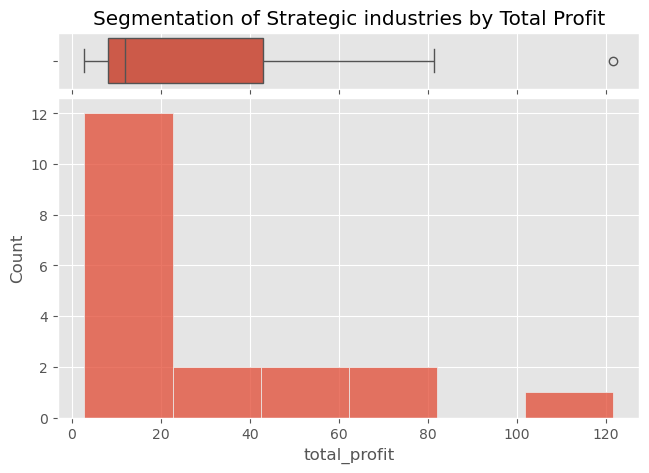

0.0000     2.8782
0.2500     8.1635
0.5000    12.0654
0.7500    42.9258
1.0000   121.5260
Name: total_profit, dtype: float64
Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 100.00 in profit
- 3 (Good) : Contributes between 42.93 and 100.00 in profit
- 2 (Marginal) : Contributes between 12.07 and 42.93 in profit
- 1 (Underperforming) : Contributes less than 12.07 in profit


In [29]:
# Define custom thresholds for segmentation
custom_bins = [0, 12.0654, 42.9258, 100, 121.5260]
custom_labels = [1, 2, 3, 4]

# Apply custom segmentation
strategic_positive_profit_metrics['segmentation score'] = pd.cut(
    strategic_positive_profit_metrics['total_profit'],
    bins=custom_bins,
    labels=custom_labels,
    include_lowest=True
).astype(pd.Int64Dtype())  # Use Int64Dtype to allow NaNs

# Fill NaN values with a default value (e.g., 0 or the lowest segment)
strategic_positive_profit_metrics['segmentation score'] = strategic_positive_profit_metrics['segmentation score'].fillna(0).astype(int)

# Plotting
fig, (ax_top, ax_bot) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(7.5, 5),
    gridspec_kw={
        'height_ratios': (0.15, 0.85),
        'hspace': 0.05
    }
)

sns.boxplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=strategic_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Strategic industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = strategic_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Strategic industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {custom_bins[3]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {custom_bins[2]:.2f} and {custom_bins[3]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {custom_bins[1]:.2f} and {custom_bins[2]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {custom_bins[1]:.2f} in profit")


In [31]:
# Define custom quantile ranges for segmentation
custom_bins = [0, 12.0654, 42.9258, 100, strategic_positive_profit_metrics['total_profit'].max()]

# Manually set the segmentation scores
strategic_positive_profit_metrics['segmentation score'] = pd.cut(
    strategic_positive_profit_metrics['total_profit'],
    bins=custom_bins,
    labels=[1, 2, 3, 4],
    include_lowest=True
).astype(int)

strategic_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
42,EMEA,Strategic,Finance,121.5260,0.0500,4
25,APJ,Strategic,Manufacturing,81.4320,0.0000,3
41,EMEA,Strategic,Energy,74.7447,0.0667,3
40,EMEA,Strategic,Consumer Products,60.6046,0.0667,3
13,AMER,Strategic,Manufacturing,56.9016,0.0667,3
9,AMER,Strategic,Consumer Products,28.9500,0.0000,2
23,APJ,Strategic,Energy,27.2412,0.0000,2
14,AMER,Strategic,Tech,21.5910,0.2000,2
45,EMEA,Strategic,Retail,19.6328,0.0000,2
44,EMEA,Strategic,Manufacturing,12.0654,0.2000,1


In [33]:
# Printing industries based on segmentation scores with regions
def list_industries_by_score(scores, description):
    industries = strategic_positive_profit_metrics[strategic_positive_profit_metrics['segmentation score'].isin(scores)]
    industry_list = industries.apply(lambda x: f"{x['Industry']} in {x['Region']}", axis=1).tolist()
    print(f"{', '.join(industry_list)} {description}")

list_industries_by_score([4], "is the highest performing industries in the Strategic segment.\nIt is strategic for customer engagement and product improvement, making it prime targets for marketing investments and discount allocations to drive growth.\n")
list_industries_by_score([3], "all maintain solid profitability.\nWhile not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.\nHowever, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.\n")
list_industries_by_score([1, 2], "are underperforming.\nThese Strategic industries struggle with profitability and should be approached with caution.\nStrategies should focus on improvement and efficiency rather than heavy marketing and discounting.\n")

Finance in EMEA is the highest performing industries in the Strategic segment.
It is strategic for customer engagement and product improvement, making it prime targets for marketing investments and discount allocations to drive growth.

Manufacturing in APJ, Energy in EMEA, Consumer Products in EMEA, Manufacturing in AMER all maintain solid profitability.
While not the highest-performing, these Strategic industries offer stable returns and present opportunities for steady growth.
However, discounts should be applied with more caution in these sectors to ensure that profitability is not compromised.

Consumer Products in AMER, Energy in APJ, Tech in AMER, Retail in EMEA, Manufacturing in EMEA, Healthcare in AMER, Finance in APJ, Finance in AMER, Transportation in AMER, Communications in AMER, Energy in AMER, Healthcare in EMEA, Tech in APJ, Tech in EMEA are underperforming.
These Strategic industries struggle with profitability and should be approached with caution.
Strategies should fo

In [34]:
###Filter positive profits (Enterprise)
pd.set_option('display.max_rows', None)
# Filtering the metrics to show only the positive profits from the Enterprise segment
enterprise_positive_profit_metrics = metrics[(metrics['total_profit'] > 0) & (metrics['Segment'] == 'Enterprise')]
# Sorting the metrics DataFrame by Region, Segment, and Industry
enterprise_positive_profit_metrics = enterprise_positive_profit_metrics.sort_values(by='total_profit', ascending=False)

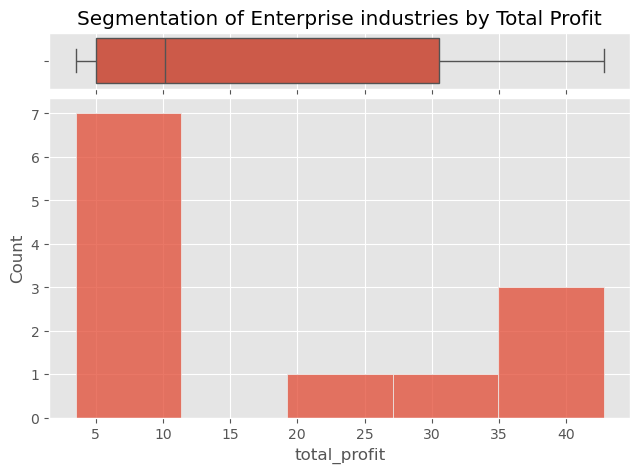

0.0000    3.4944
0.2500    5.0098
0.5000   10.1537
0.7500   30.5388
1.0000   42.8167
Name: total_profit, dtype: float64
Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :
- 4 (Ideal) : Contributes more than 30.54 in profit
- 3 (Good) : Contributes between 10.15 and 30.54 in profit
- 2 (Marginal) : Contributes between 5.01 and 10.15 in profit
- 1 (Underperforming) : Contributes less than 5.01 in profit


In [35]:
fig, (ax_top, ax_bot) = plt.subplots(
                            nrows=2,
                            ncols=1,
                            figsize=(7.5, 5),
                            gridspec_kw={
                                'height_ratios': (0.15, 0.85),
                                'hspace': 0.05
                            }
                        )

sns.boxplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_top)
sns.histplot(data=enterprise_positive_profit_metrics, x='total_profit', ax=ax_bot)

ax_top.set(
    title='Segmentation of Enterprise industries by Total Profit'
)

plt.show()

# Displaying quantiles
quantiles = enterprise_positive_profit_metrics['total_profit'].quantile([0, 0.25, 0.5, 0.75, 1])
print(quantiles)

# Printing the segmentation statement
print(f"Based on the distribution above, we will group Enterprise industries based on their total profit into 4 groups, namely :\n"
      f"- 4 (Ideal) : Contributes more than {quantiles[0.75]:.2f} in profit\n"
      f"- 3 (Good) : Contributes between {quantiles[0.5]:.2f} and {quantiles[0.75]:.2f} in profit\n"
      f"- 2 (Marginal) : Contributes between {quantiles[0.25]:.2f} and {quantiles[0.5]:.2f} in profit\n"
      f"- 1 (Underperforming) : Contributes less than {quantiles[0.25]:.2f} in profit")


In [36]:
enterprise_positive_profit_metrics['segmentation score'] = pd.qcut(
    enterprise_positive_profit_metrics['total_profit'],             
    q=4,                               
    labels=[1, 2, 3, 4]                 
).astype(int)

enterprise_positive_profit_metrics

,Region,Segment,Industry,total_profit,avg_discount,segmentation score
28,EMEA,Enterprise,Energy,42.8167,0.1000,4
2,AMER,Enterprise,Healthcare,38.2900,0.0000,4
18,APJ,Enterprise,Transportation,35.8900,0.2000,4
29,EMEA,Enterprise,Finance,28.7550,0.0000,3
3,AMER,Enterprise,Manufacturing,20.5390,0.0000,3
1,AMER,Enterprise,Finance,10.8682,0.0000,3
17,APJ,Enterprise,Manufacturing,9.4392,0.2000,2
30,EMEA,Enterprise,Retail,8.4900,0.0000,2
31,EMEA,Enterprise,Tech,5.2026,0.2000,2
16,APJ,Enterprise,Finance,4.4312,0.2000,1


Total profits in the Enterprise segment are too similar and not high enough to justify distinct performance categories. However, we can use the data above along with previous analysis of the Enterprise segment (Segmentation EDA), and suggest Finance and Energy industries in EMEA.

**Key findings:**
1. Throughout the year, AMER's sales and net profits were consistently lower, with noticeable peaks only in September and November. Overall, it faced challenges in achieving high sales volumes and market presence compared to other regions.
2. EMEA's performance surged from September onwards, with the highest sales in October, November, and December. This region led in both sales and net profit, demonstrating the strongest financial performance overall.
3. APJ showed superior performance earlier in the year, particularly in January and March, achieving high sales and net profits. Despite its strong start, APJ experienced significant fluctuations in sales and profits during the mid-year months.
4. In the SMB segment, Finance in EMEA, along with Communications and Energy industries in APJ perform best and need marketing focus. 
5. In the Strategic segment, Finance in EMEA excel. 
6. In the Enterprise segment, focus on Finance and Energy industries in EMEA for strategic growth. 